In [2]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

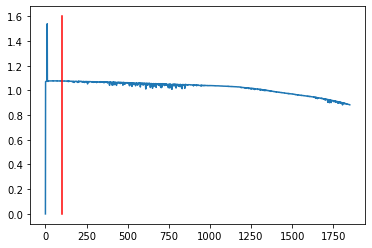

In [3]:
plt.plot(range(len(bat_dict['b1c0']['summary']['QD'])),bat_dict['b1c0']['summary']['QD'])
plt.plot([100,100],np.linspace(0,1.6,2),color='red')

In [4]:
bat_dict['b1c0']['summary']['QD'][300]

1.0698825

In [5]:
bat_dict['b1c0']['cycle_life'].reshape(-1)

array([1852.])

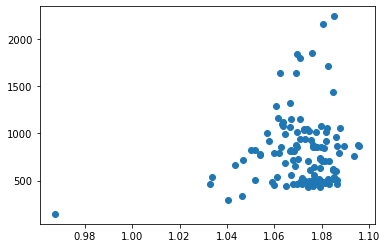

In [6]:
capa=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    Capa=bat_dict[j]['summary']['QD'][100]
    Cycle=bat_dict[j]['cycle_life'].reshape(-1).tolist()
    capa=np.append(capa,Capa)
    cycle=np.append(cycle,Cycle)
    
plt.scatter(capa,cycle)    

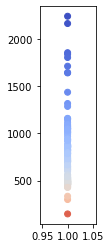

In [7]:
# 색 조절.
color=[]
cycle_=[]
plt.figure(figsize=(1,4))
for i,j in enumerate(bat_dict.keys()):
    sortcycle=bat_dict[j]['cycle_life']
    cycle_.append(sortcycle.tolist())
    c=(np.log10(sortcycle)-2)/(np.log10(2300)-2)
    color.append(c.tolist())

a=np.array(color).ravel()
b=np.array(cycle_).ravel()
changecolor=cm.coolwarm_r(a)
plt.scatter(np.ones(len(a)),b,c=cm.coolwarm_r(a))

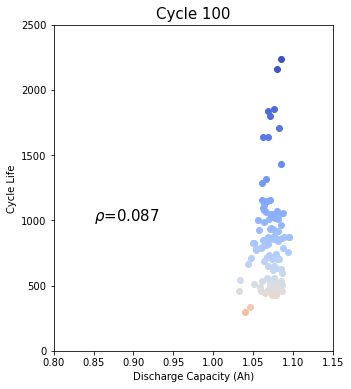

In [8]:
plt.figure(figsize=(5,6))

capa=np.array([])
cycle=np.array([])

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    Capa=bat_dict[j]['summary']['QD'][100]
    Cycle=bat_dict[j]['cycle_life'].reshape(-1).tolist()
    capa=np.append(capa,Capa)
    cycle=np.append(cycle,Cycle)
    plt.scatter(Capa,Cycle,color=changecolor[i])   
plt.xlabel('Discharge Capacity (Ah)')
plt.xlim(0.8,1.15)
plt.ylabel('Cycle Life')
plt.ylim(0,2500)
plt.title('Cycle 100',size=15)
font={'size':15}
r = np.round(np.corrcoef(capa,cycle),3)
plt.text(0.85,1000,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()        


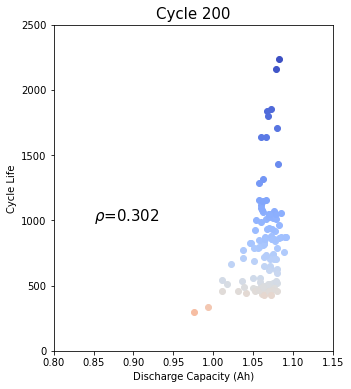

In [9]:
plt.figure(figsize=(5,6))

capa=np.array([])
cycle=np.array([])

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    Capa=bat_dict[j]['summary']['QD'][200]
    Cycle=bat_dict[j]['cycle_life'].reshape(-1).tolist()
    capa=np.append(capa,Capa)
    cycle=np.append(cycle,Cycle)
    plt.scatter(Capa,Cycle,color=changecolor[i])   
plt.xlabel('Discharge Capacity (Ah)')
plt.xlim(0.8,1.15)
plt.ylabel('Cycle Life')
plt.ylim(0,2500)
plt.title('Cycle 200',size=15)
font={'size':15}
r = np.round(np.corrcoef(capa,cycle),3)
plt.text(0.85,1000,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  

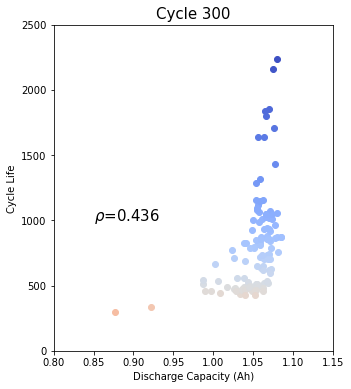

In [10]:
plt.figure(figsize=(5,6))

capa=np.array([])
cycle=np.array([])

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    Capa=bat_dict[j]['summary']['QD'][300]
    Cycle=bat_dict[j]['cycle_life'].reshape(-1).tolist()
    capa=np.append(capa,Capa)
    cycle=np.append(cycle,Cycle)
    plt.scatter(Capa,Cycle,color=changecolor[i])   
plt.xlabel('Discharge Capacity (Ah)')
plt.xlim(0.8,1.15)
plt.ylabel('Cycle Life')
plt.ylim(0,2500)
plt.title('Cycle 300',size=15)
font={'size':15}
r = np.round(np.corrcoef(capa,cycle),3)
plt.text(0.85,1000,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show() 

In [11]:
# 1 . cycle 2 capacity 에 대한 5% 값, 상대적fade
# 2. 1.1AH 에 대한 5% 값 (1.045Ah) 절대적 fade
'''However, this trend is late to develop. 
The average number of cycles to reach 5% capacity fade is 508 and 425 cycles for relative and absolute capacity fade,
respectively.


사이클 수명과 ΔQ100-10 (V) 기능의 로그 분산 간의 상관 계수는 5 % 용량 페이드에 도달하는 사이클 수 간의 상관 계수와 유사.

이 분석은 용량 페이드 기능을 사용하여 특정 상황에서주기 수명을 예측하는 데 사용할 수 있음을 시사하지만 
특정 용량 페이드에 도달 할 때까지 기다리는 것도주기 수명에 따라 확장하는 바람직하지 않은 속성이 있습니다. 
즉, 긴주기 수명을 가진 셀은 예측이 이루어질 때까지 더 많은 시간이 필요합니다. . 

또한 로그주기 수명을 단일 기능으로 사용하여 단일 기능 선형 모델을 구축합니다.
용량 페이드는 사이클 2에서 측정 된 용량의 상대적 변화로 정의되었습니다.
원고에서와 동일한 교육 및 테스트 분할을 사용하여 RMSE는 다양한 용량 페이드 기준에 대해 계산되고 보충 그림 12에 표시됩니다.

물론 상대 인덱싱 방식을 사용한다는 것은 예측에 사용되는주기 수가 배터리마다 다르다는 것을 의미합니다. 
보충 그림 12에 대한 예측에 사용 된 사이클 수의 분포는 보충 그림 13에 나와 있습니다.
용량 페이드 모델의 오류는 2 % 용량 페이드에서 ΔQ (V) 기능을 사용하는 모델과 유사하며 평균 425 사이클이 필요하지만 
데이터에 대한 마지막 예측은주기 895에서 발생합니다.

'''



'However, this trend is late to develop. \nThe average number of cycles to reach 5% capacity fade is 508 and 425 cycles for relative and absolute capacity fade,\nrespectively.\n\n\n사이클 수명과 ΔQ100-10 (V) 기능의 로그 분산 간의 상관 계수는 5 % 용량 페이드에 도달하는 사이클 수 간의 상관 계수와 유사.\n\n이 분석은 용량 페이드 기능을 사용하여 특정 상황에서주기 수명을 예측하는 데 사용할 수 있음을 시사하지만 \n특정 용량 페이드에 도달 할 때까지 기다리는 것도주기 수명에 따라 확장하는 바람직하지 않은 속성이 있습니다. \n즉, 긴주기 수명을 가진 셀은 예측이 이루어질 때까지 더 많은 시간이 필요합니다. . \n\n또한 로그주기 수명을 단일 기능으로 사용하여 단일 기능 선형 모델을 구축합니다.\n용량 페이드는 사이클 2에서 측정 된 용량의 상대적 변화로 정의되었습니다.\n원고에서와 동일한 교육 및 테스트 분할을 사용하여 RMSE는 다양한 용량 페이드 기준에 대해 계산되고 보충 그림 12에 표시됩니다.\n\n물론 상대 인덱싱 방식을 사용한다는 것은 예측에 사용되는주기 수가 배터리마다 다르다는 것을 의미합니다. \n보충 그림 12에 대한 예측에 사용 된 사이클 수의 분포는 보충 그림 13에 나와 있습니다.\n용량 페이드 모델의 오류는 2 % 용량 페이드에서 ΔQ (V) 기능을 사용하는 모델과 유사하며 평균 425 사이클이 필요하지만 \n데이터에 대한 마지막 예측은주기 895에서 발생합니다.\n\n'

In [12]:
bat_dict['b1c1']['summary']['QD'][0]

0.0

In [13]:
bat_dict['b1c1']['summary']['QD'][1]

1.0753012

In [14]:
Rel=bat_dict['b1c1']['summary']['QD'][2]
Rel*0.95

1.0227817799999999

In [15]:
Delcycle=np.where(bat_dict['b1c1']['summary']['QD']<Rel*0.95)
Relcycle=np.delete(bat_dict['b1c1']['summary']['QD'],Delcycle)
Relcycle[-1], len(Relcycle), list(Delcycle)[0][1]

(1.023042, 1449, 1445)

In [16]:
for i,j in enumerate(bat_dict.keys()):
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    print(list(Delcycle)[0][2]-list(Delcycle)[0][1])


41
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
19
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


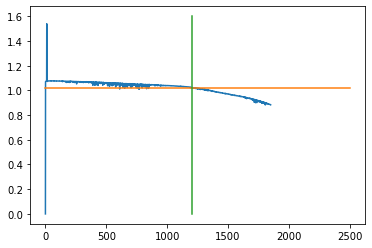

In [17]:
np.where(bat_dict['b1c0']['summary']['QD']<Rel*0.95)
plt.plot(range(len(bat_dict['b1c0']['summary']['QD'])),bat_dict['b1c0']['summary']['QD'])
x=[0,2500]
y=[bat_dict['b1c1']['summary']['QD'][2]*0.95,bat_dict['b1c1']['summary']['QD'][2]*0.95]
x1=[1202,1202]
y1=[0,1.6]
plt.plot(x,y)
plt.plot(x1,y1)

#b1c0 는 noise 가 끝 났을 때 값으로 cycle life 로 설정. 이는 앞에 noise 때문에 제대로 된 값이 나타나지 않음.

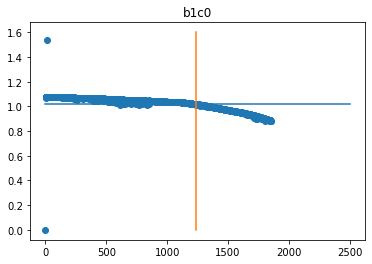

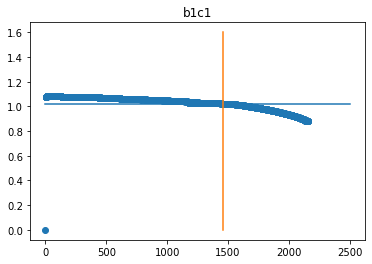

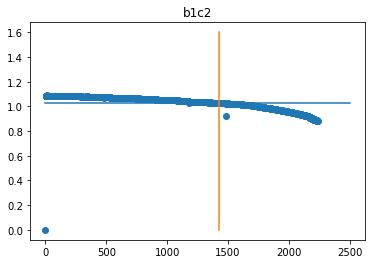

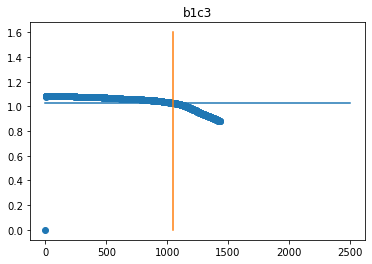

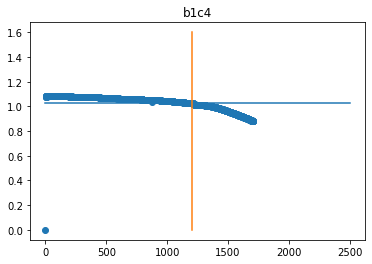

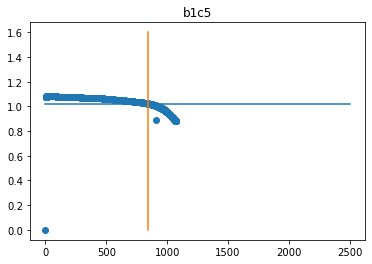

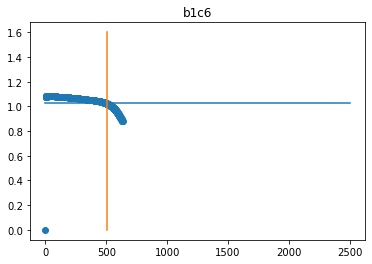

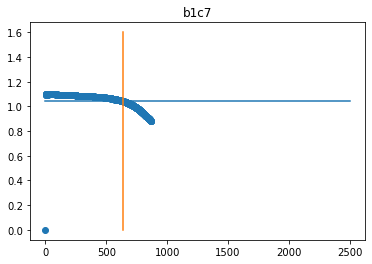

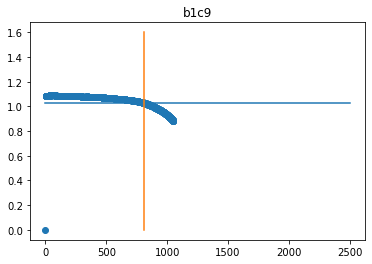

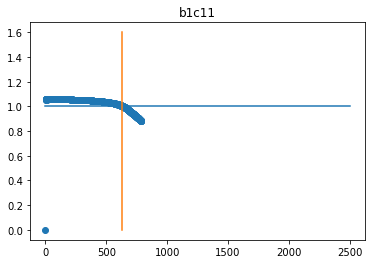

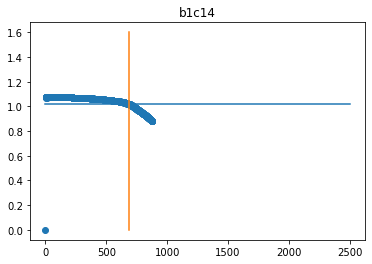

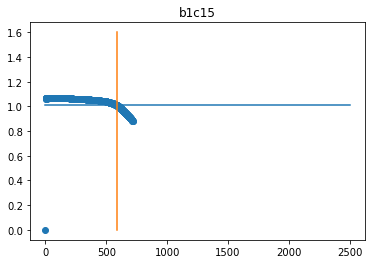

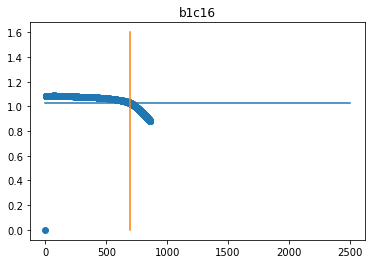

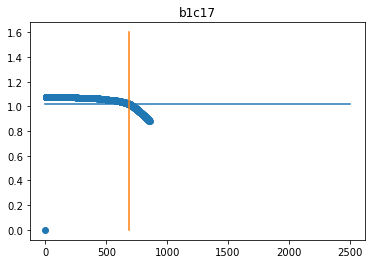

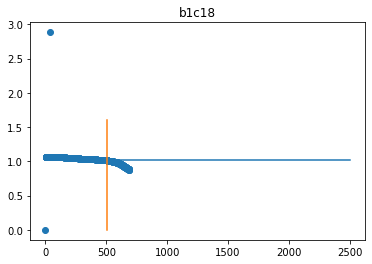

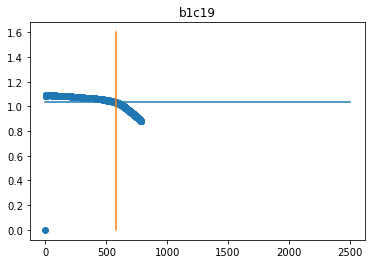

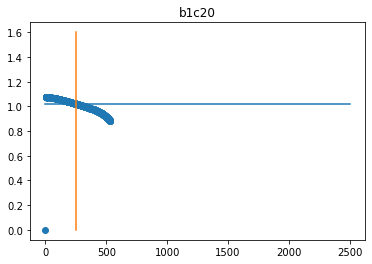

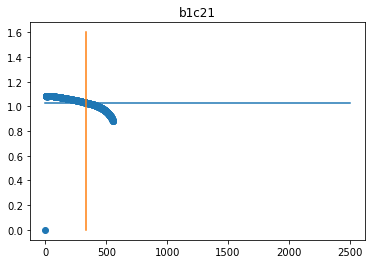

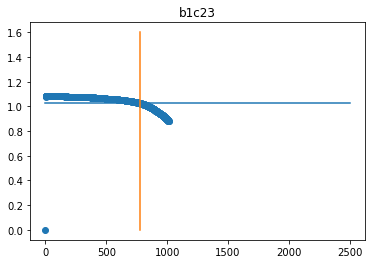

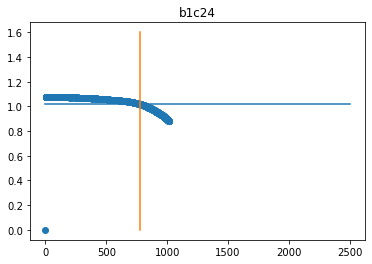

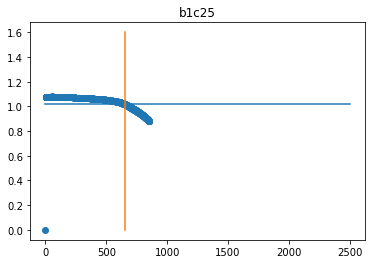

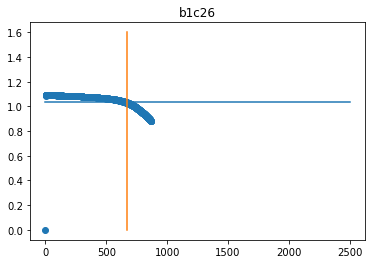

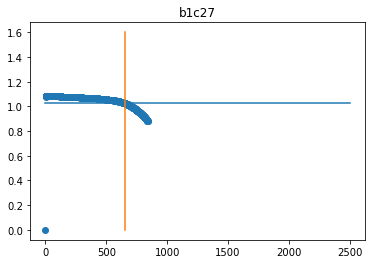

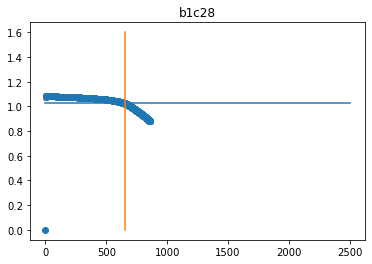

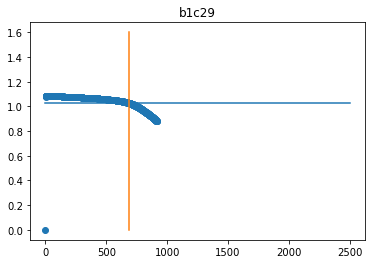

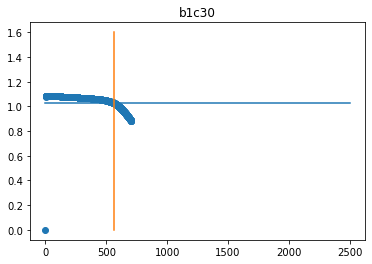

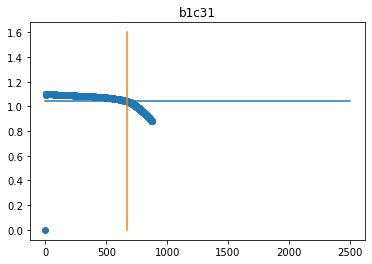

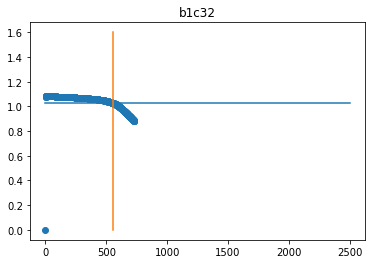

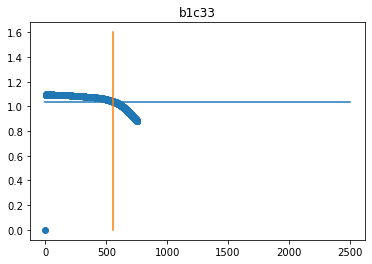

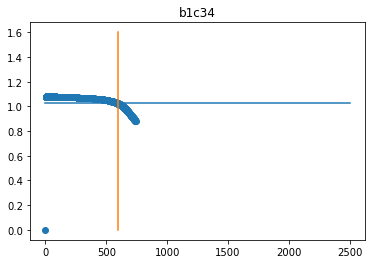

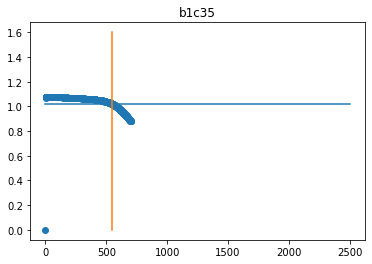

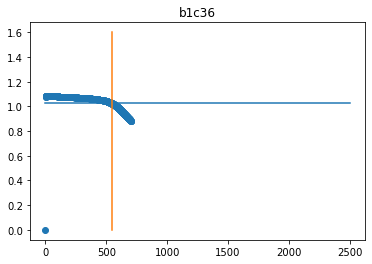

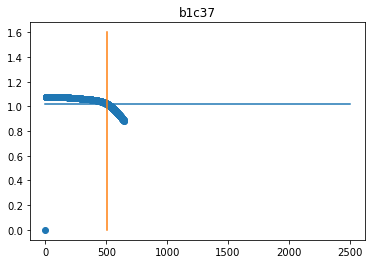

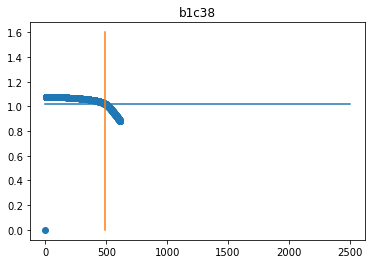

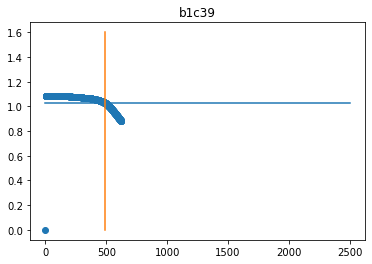

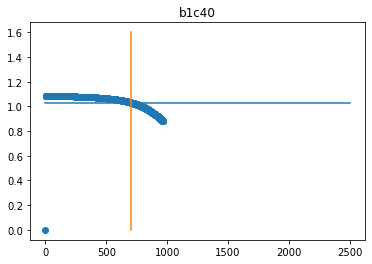

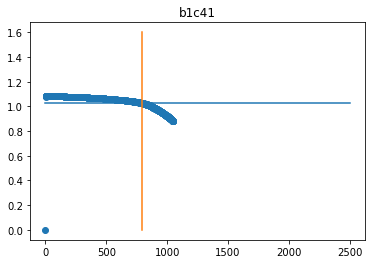

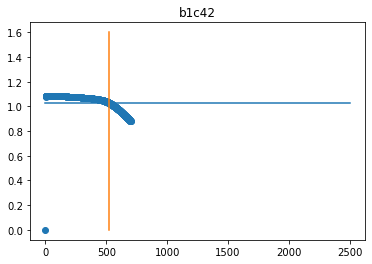

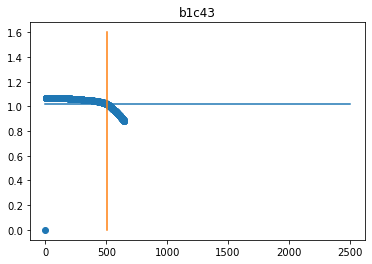

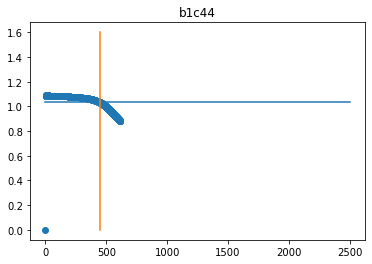

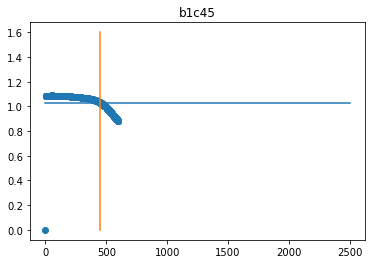

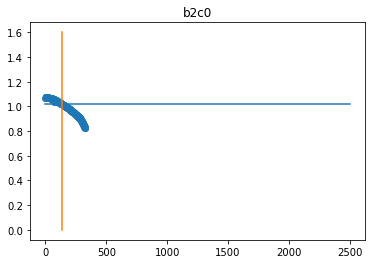

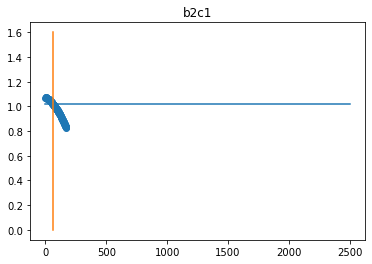

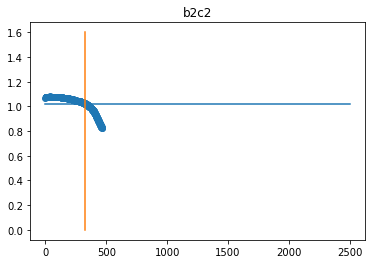

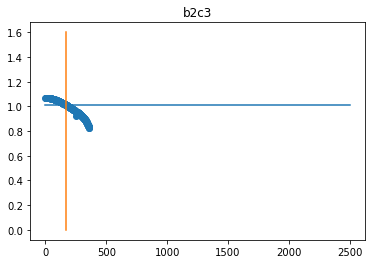

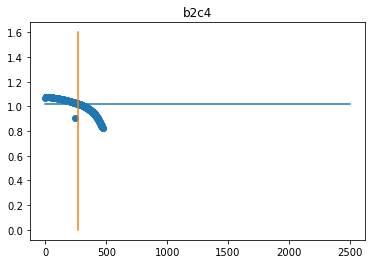

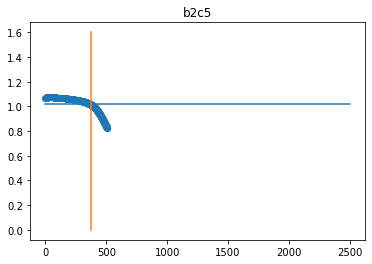

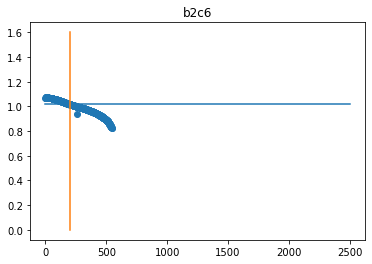

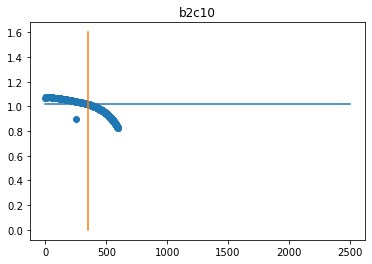

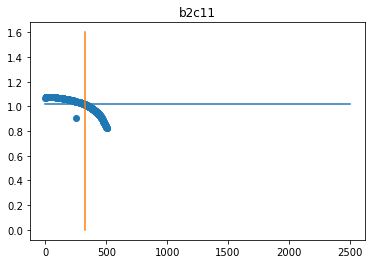

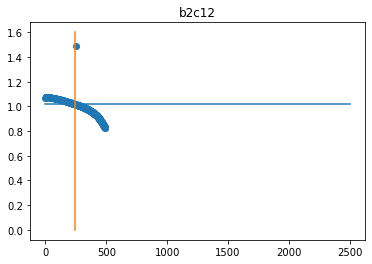

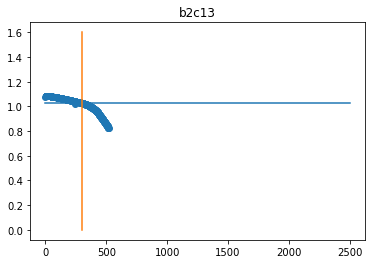

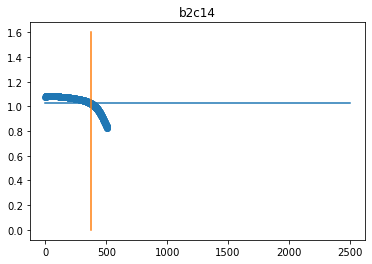

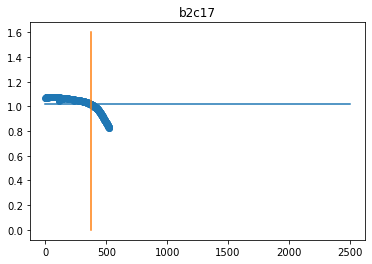

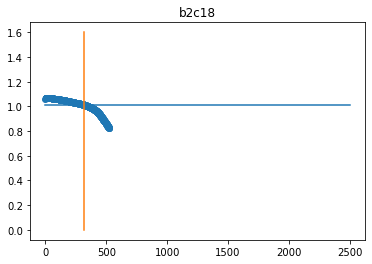

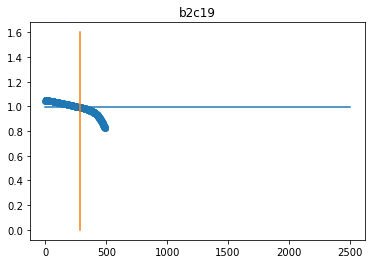

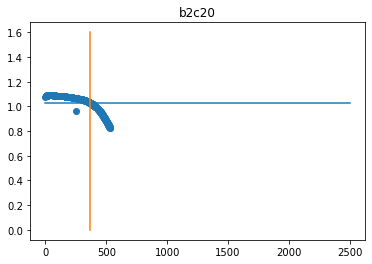

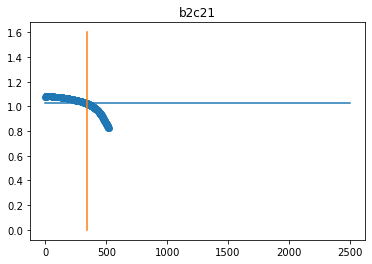

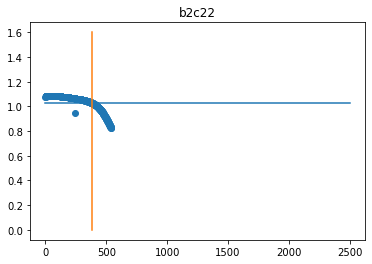

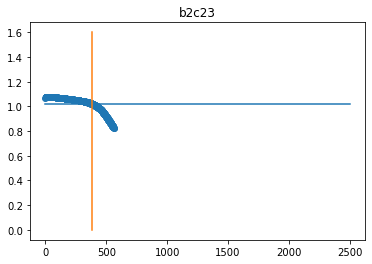

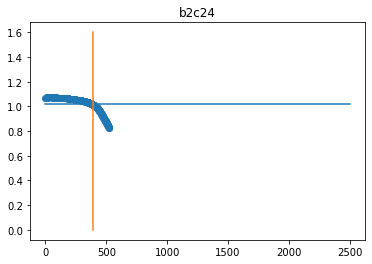

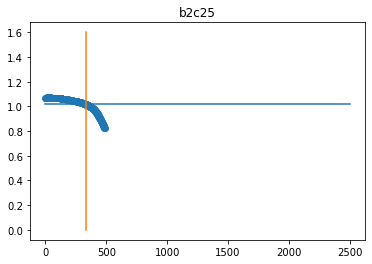

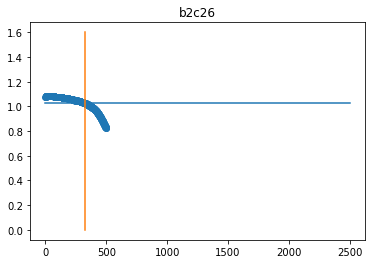

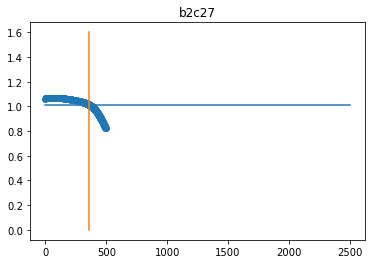

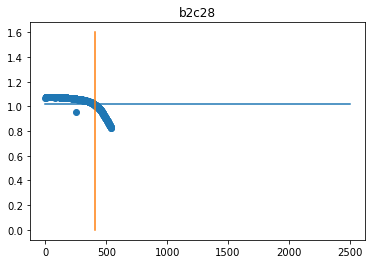

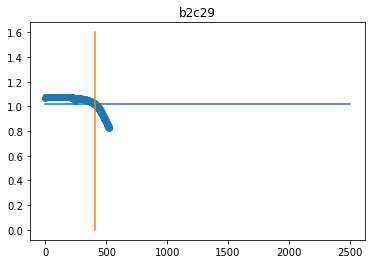

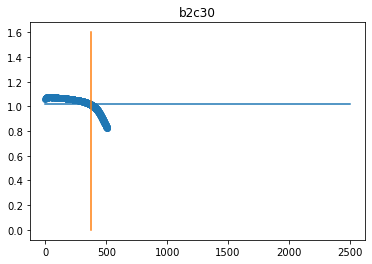

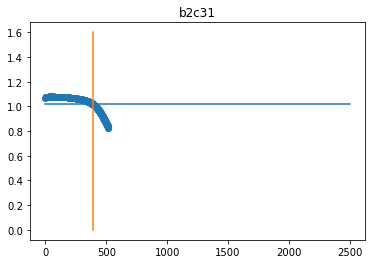

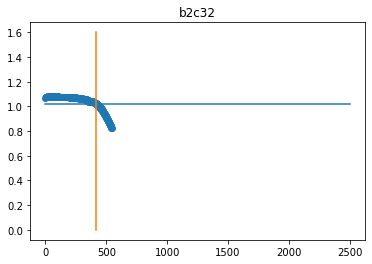

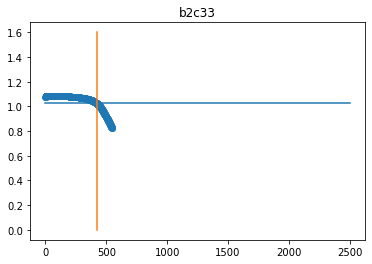

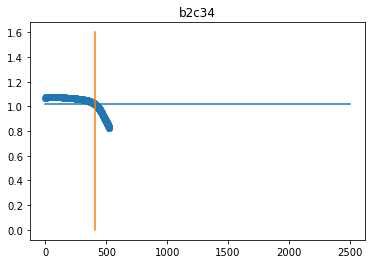

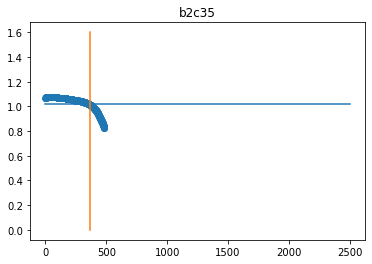

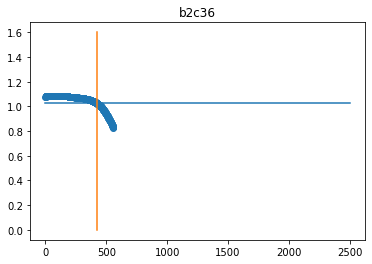

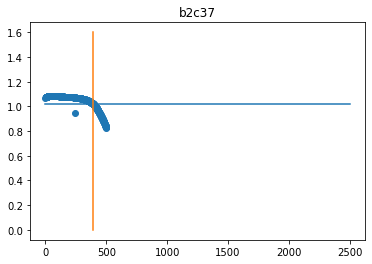

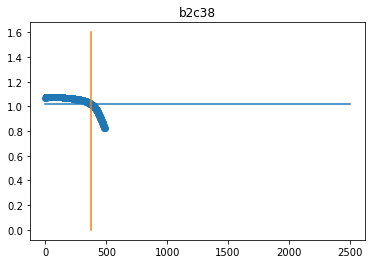

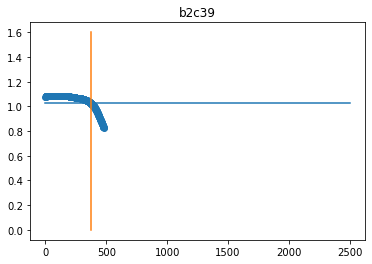

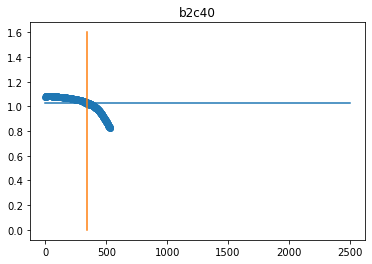

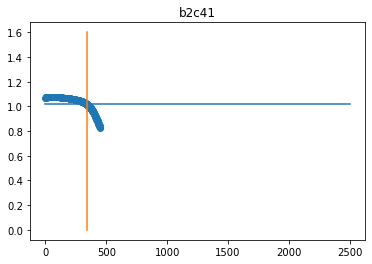

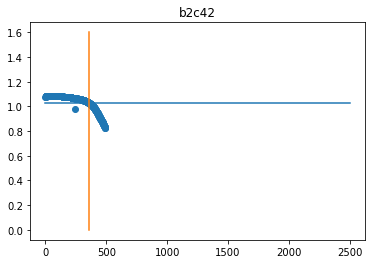

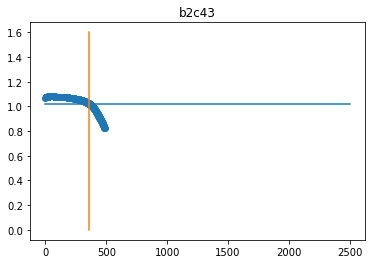

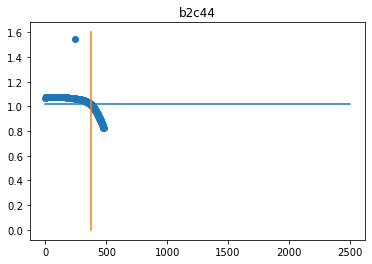

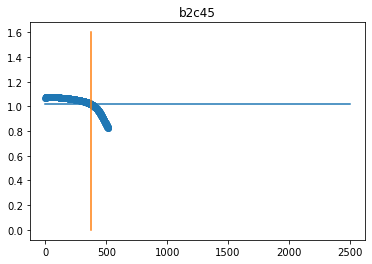

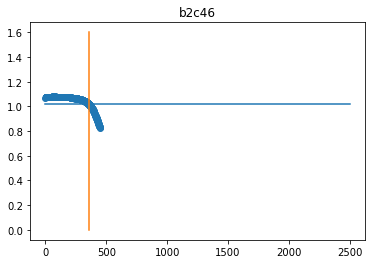

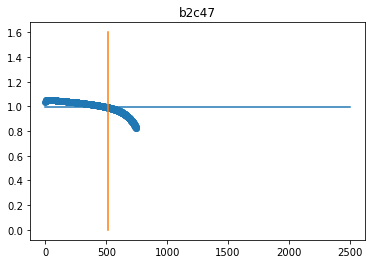

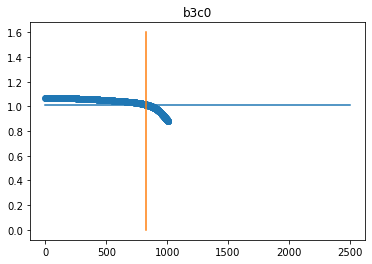

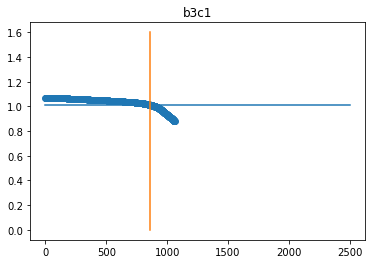

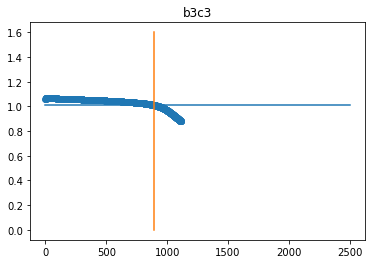

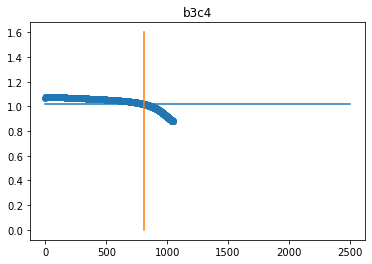

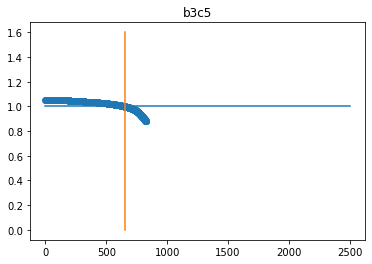

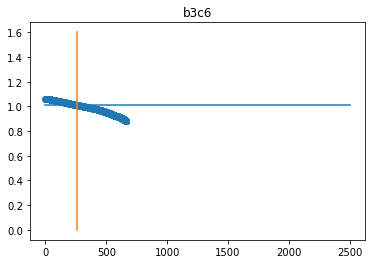

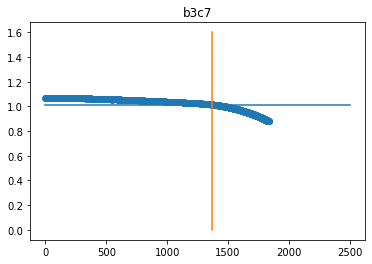

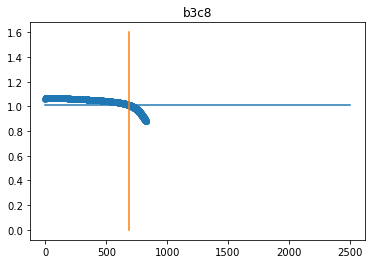

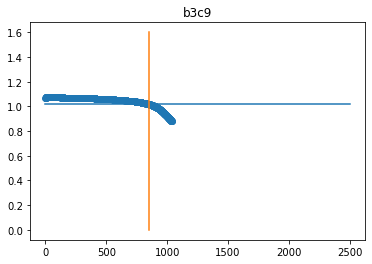

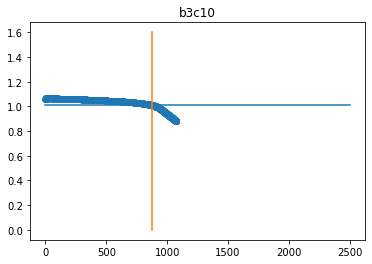

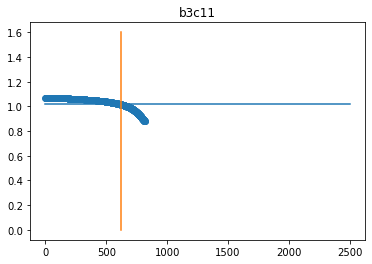

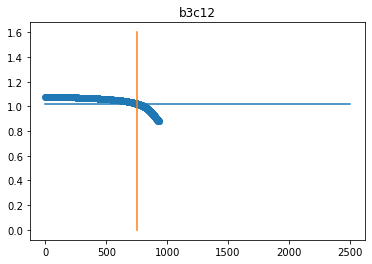

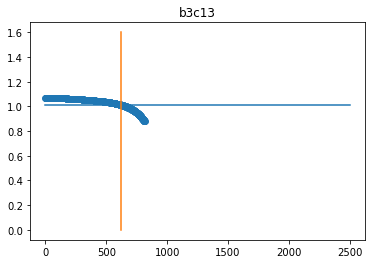

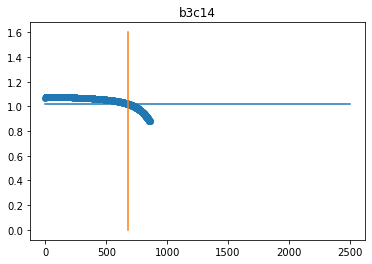

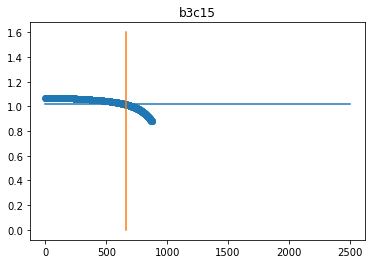

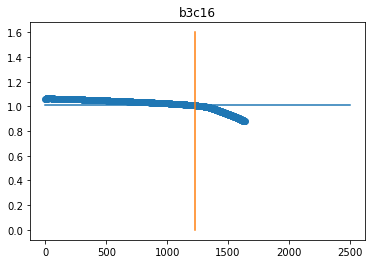

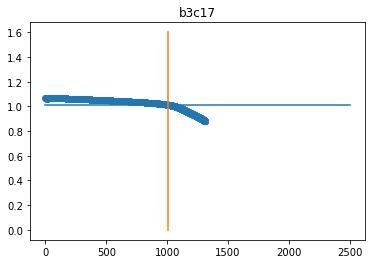

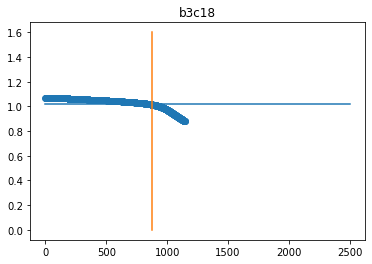

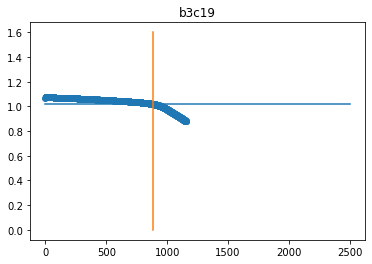

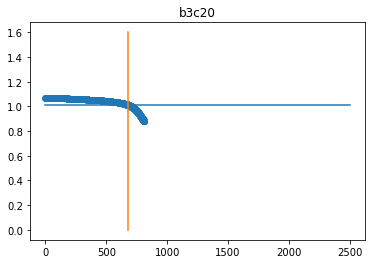

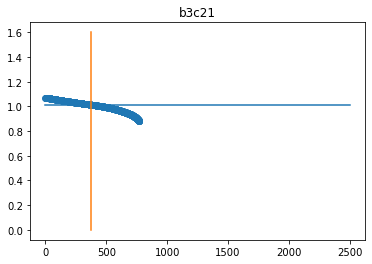

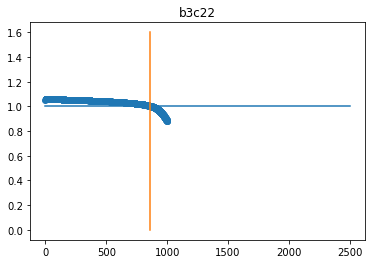

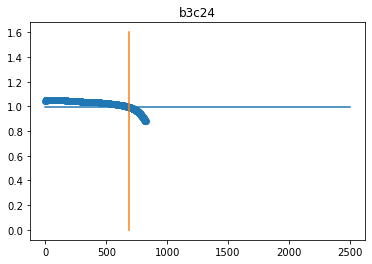

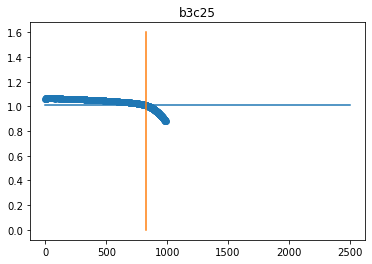

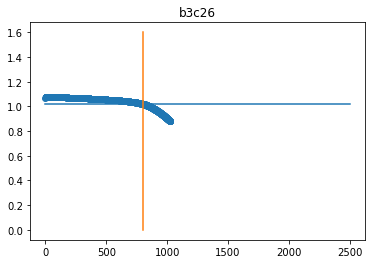

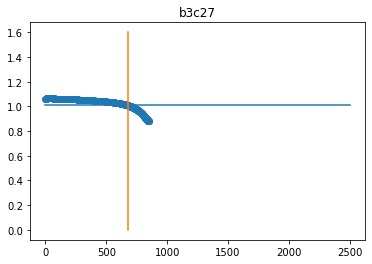

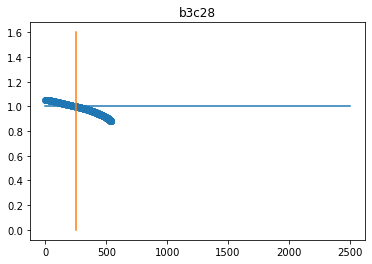

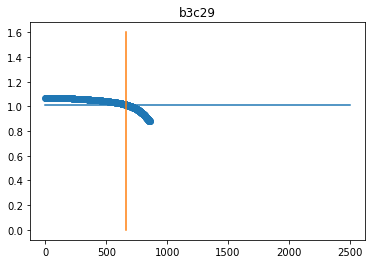

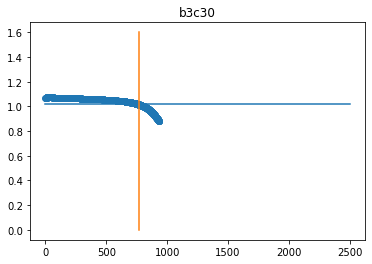

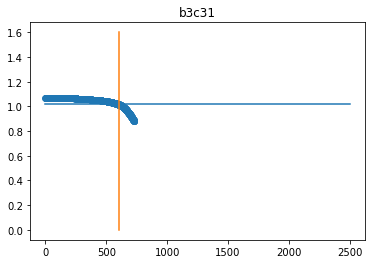

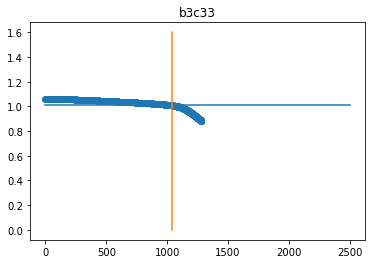

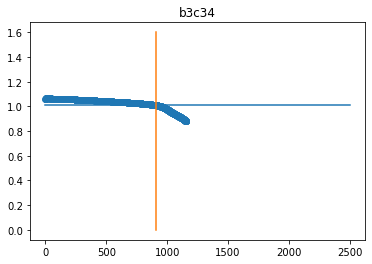

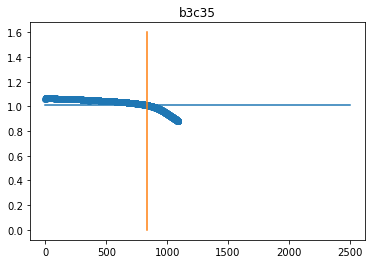

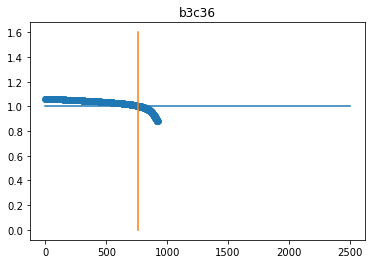

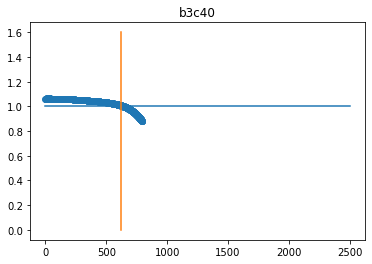

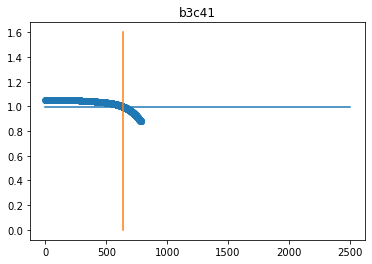

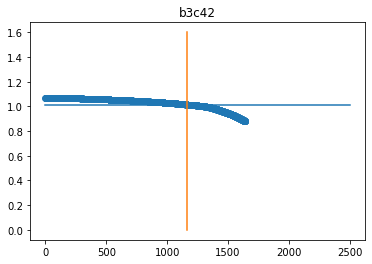

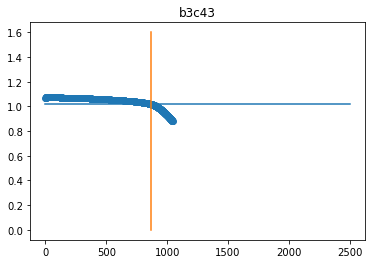

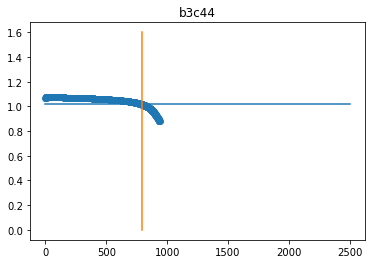

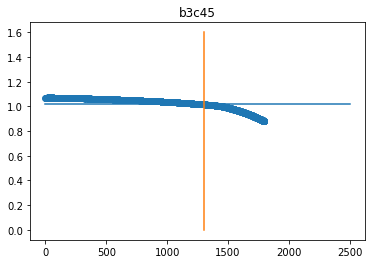

In [18]:
for i,j in enumerate(bat_dict.keys()):
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    plt.scatter(range(len(bat_dict[j]['summary']['QD'])),bat_dict[j]['summary']['QD'])
    x=[0,2500]
    y=[Rel*0.95,Rel*0.95]
    x1=[a,a]
    y1=[0,1.6]
    plt.plot(x,y)
    plt.plot(x1,y1)
    plt.title(j)
    plt.show()

In [20]:
b2c19, b2c47, b3c0,b3c1,b3c3,b3c5,b3c6,b3c7,b3c8,b3c10,b3c13,b3c21,b3c22,b3c24,b3c25,b3c27,b3c28,b3c29,b3c33
b3c34,b3c35,b3c36,b3c40

# b1c0 뿐 아니라 다양한 샘플에서 값이 다르게 나타남을 확인할 수 있다. 이에따라 얻어낸 값의 다음값이 
# 95% 보다 클 경우 

NameError: name 'b2c19' is not defined

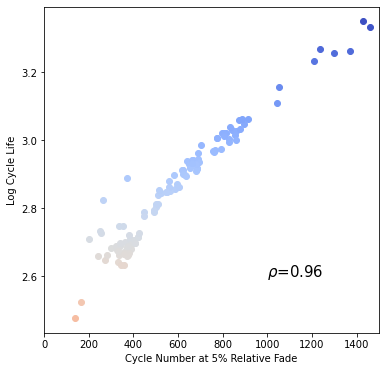

In [21]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  

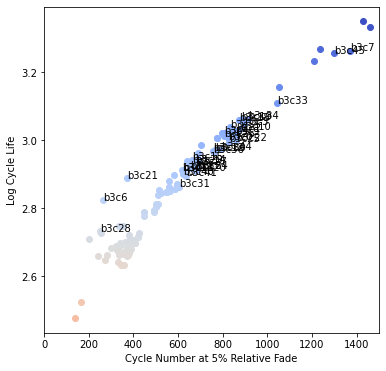

In [22]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
    if any(x in j for x in batch3.keys()):
        font={'size':5}
        plt.text(a,Cycle,j)
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
plt.show()  

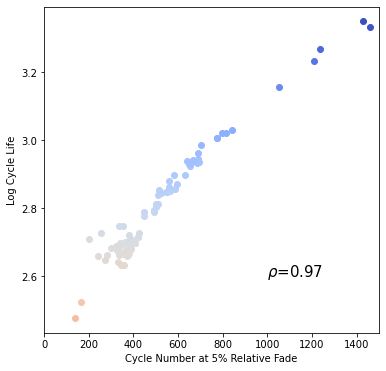

(0.0, 10.0)

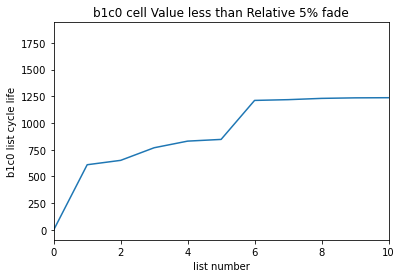

In [23]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    if any(x in j for x in batch3.keys()):
        continue
    if j=='b2c1':
        continue
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    if j=='b1c0':
        y=list(Delcycle)[0]
        x=range(len(y))
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  
plt.plot(x,y)
plt.title('b1c0 cell Value less than Relative 5% fade')
plt.xlabel('list number')
plt.ylabel('b1c0 list cycle life')
plt.xlim(0,10)

1236


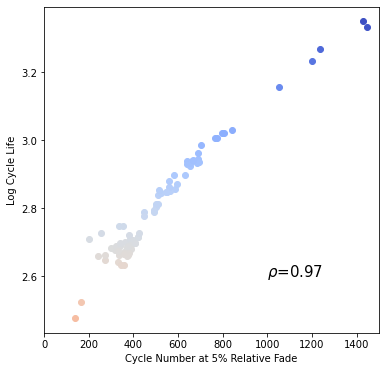

(0.0, 10.0)

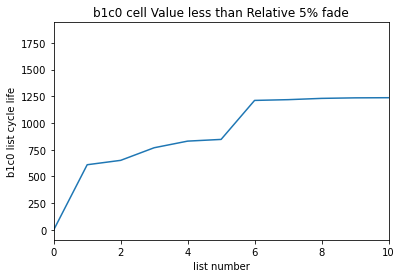

In [24]:
# 5% fade 인 곳을 찾아주는 코드 

plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+2]-list(Delcycle)[0][k+1])==1:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]


for i,j in enumerate(bat_dict.keys()):
    if any(x in j for x in batch3.keys()):
        continue
    if j=='b2c1':
        continue
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    a=fin(Delcycle)
    if j=='b1c0':
        print(a)
        y=list(Delcycle)[0]
        x=range(len(y))
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  
plt.plot(x,y)
plt.title('b1c0 cell Value less than Relative 5% fade')
plt.xlabel('list number')
plt.ylabel('b1c0 list cycle life')
plt.xlim(0,10)

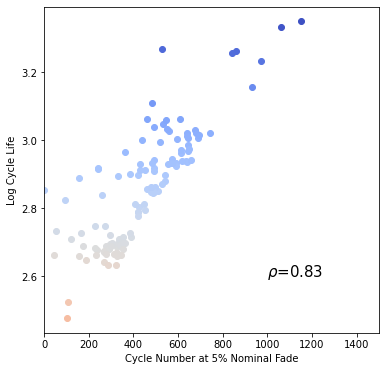

In [25]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Nom=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Nom*0.95)
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Nominal Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  

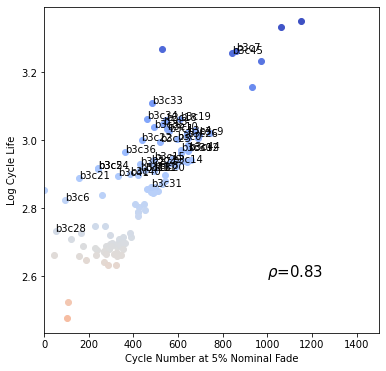

In [26]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])
for i,j in enumerate(bat_dict.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if j=='b2c1':
        continue
    Nom=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Nom*0.95)
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
    if any(x in j for x in batch3.keys()):
        font={'size':5}
        plt.text(a,Cycle,j)
plt.xlabel('Cycle Number at 5% Nominal Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  

526
882


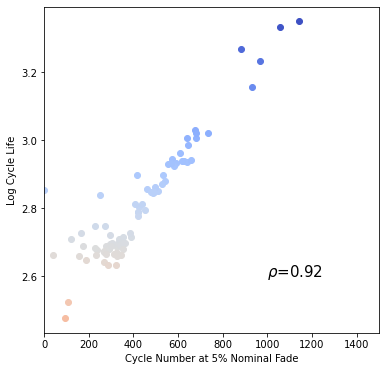

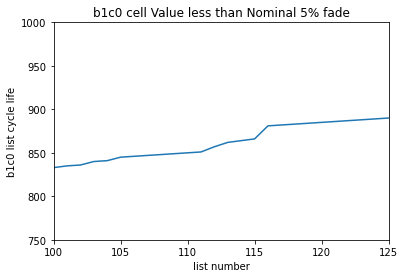

Text(0, 0.5, 'b1c0 list cycle life')

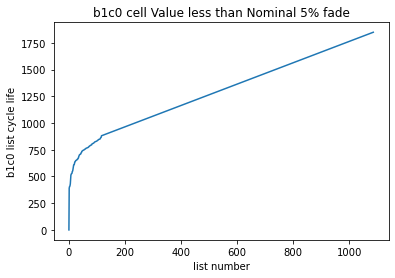

In [27]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+2]-list(Delcycle)[0][k+1])==1:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

for i,j in enumerate(bat_dict.keys()):
    if any(x in j for x in batch3.keys()):
        continue
    if j=='b2c1':
        continue
    Nom=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Nom*0.95)
    a=list(Delcycle)[0][1]
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    a=fin(Delcycle)
    if j=='b1c0':
        print(a)
        y=list(Delcycle)[0]
        x=range(len(y))
        a=list(Delcycle)[0][117]
        print(a)
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Nominal Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  
plt.plot(x,y)
plt.title('b1c0 cell Value less than Nominal 5% fade')
plt.xlabel('list number')
plt.ylabel('b1c0 list cycle life')
plt.xlim(100,125)
plt.ylim(750,1000)
plt.show()
plt.plot(x,y)
plt.title('b1c0 cell Value less than Nominal 5% fade')
plt.xlabel('list number')
plt.ylabel('b1c0 list cycle life')

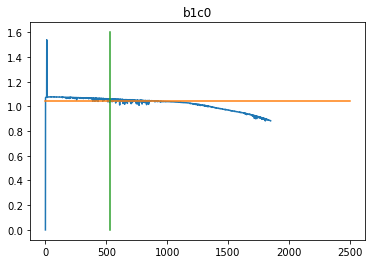

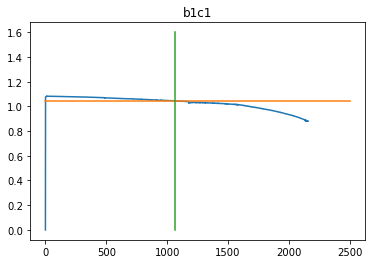

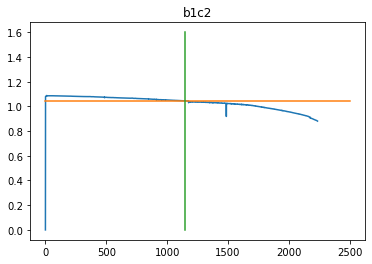

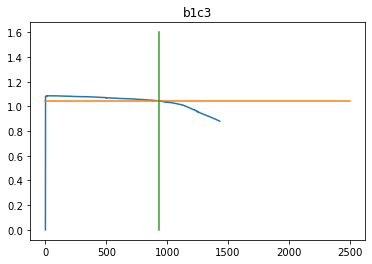

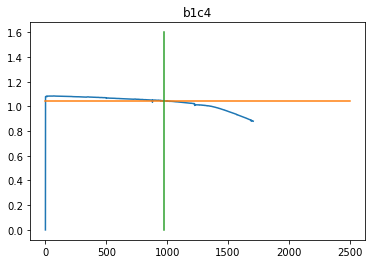

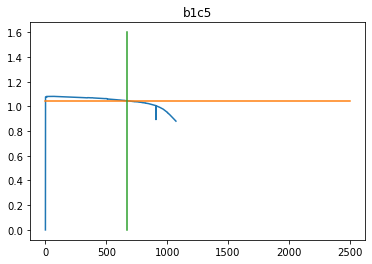

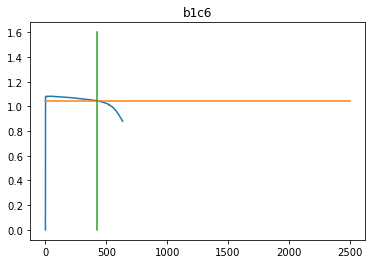

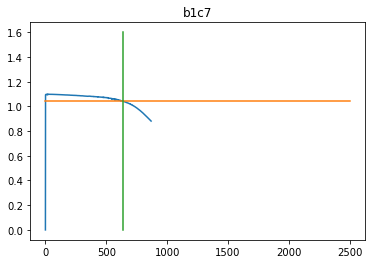

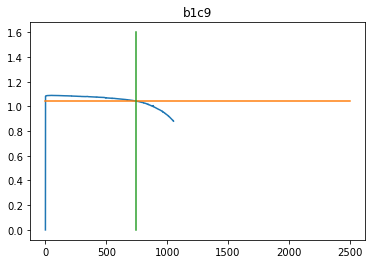

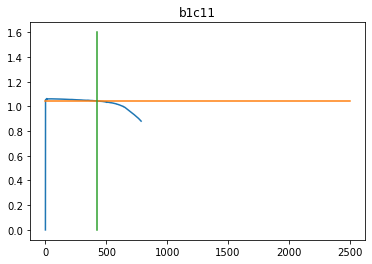

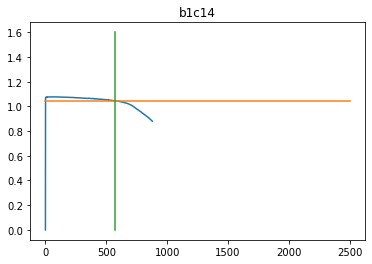

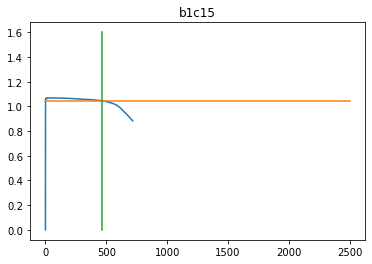

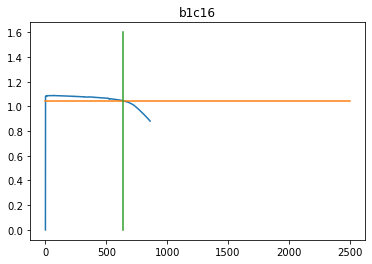

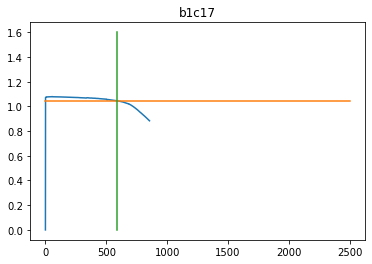

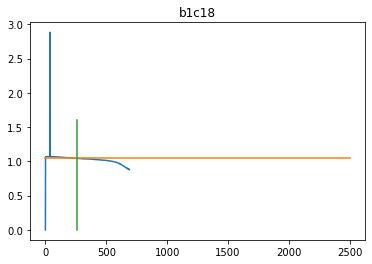

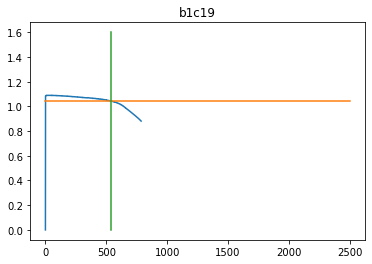

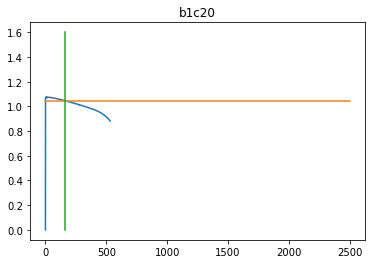

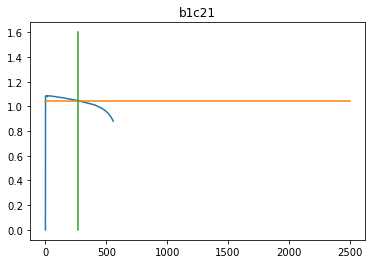

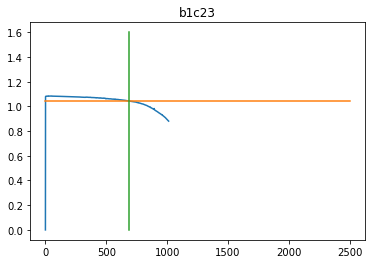

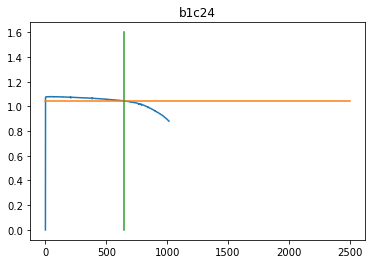

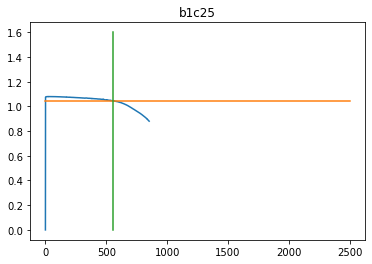

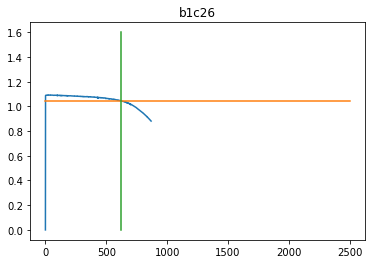

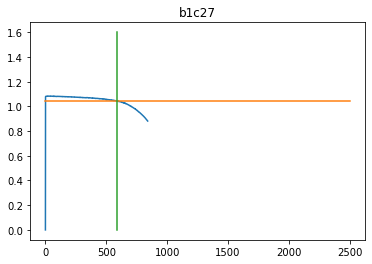

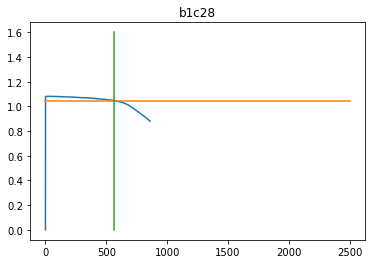

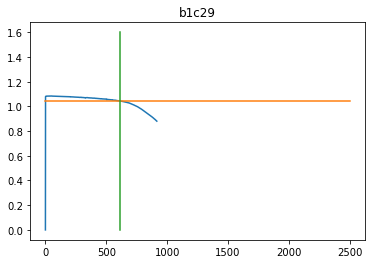

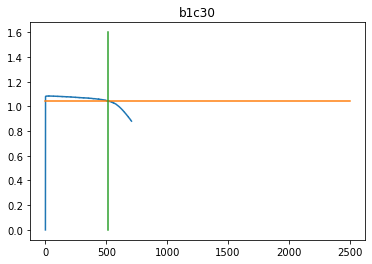

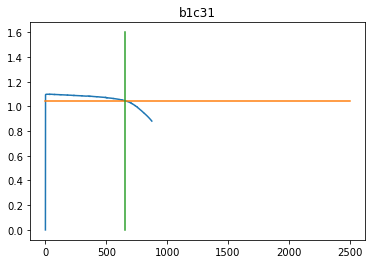

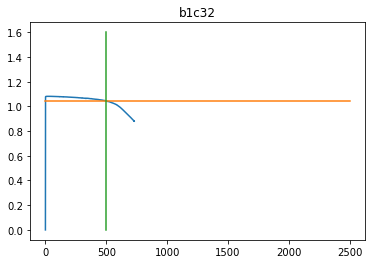

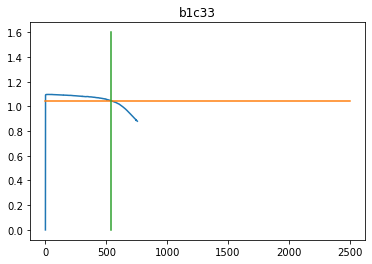

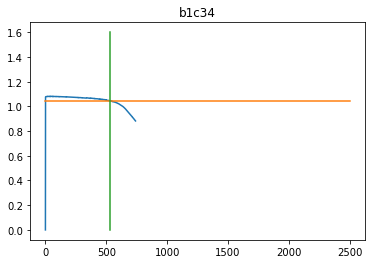

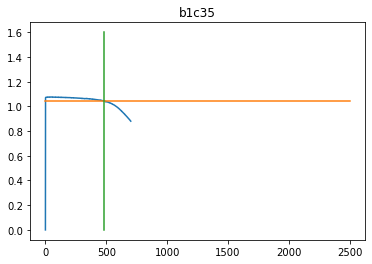

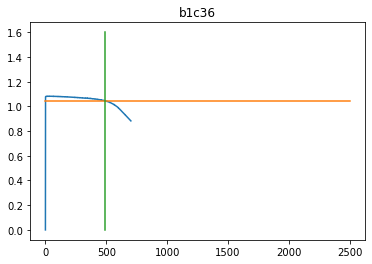

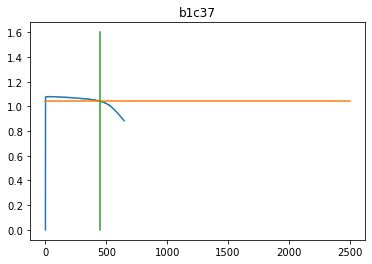

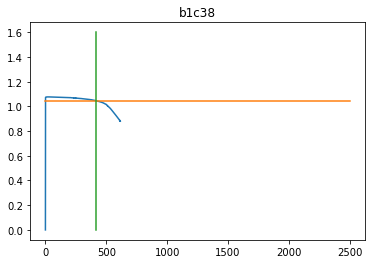

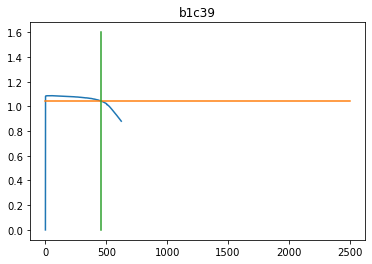

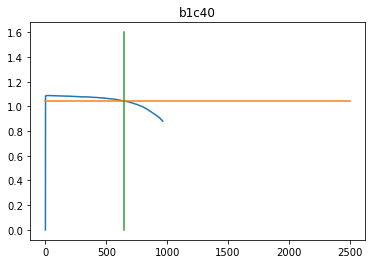

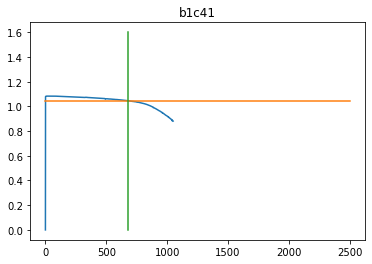

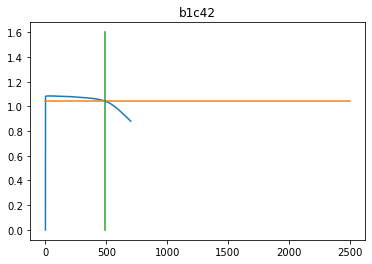

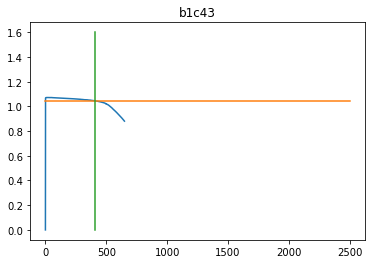

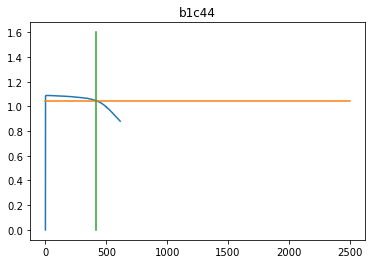

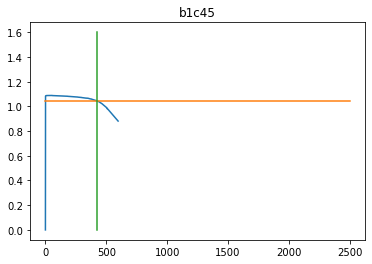

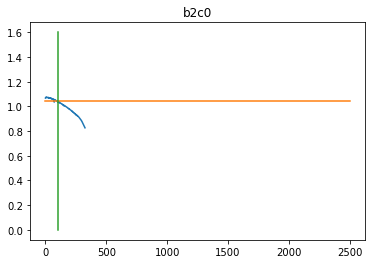

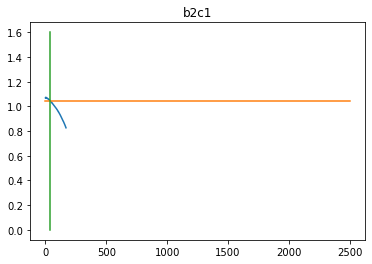

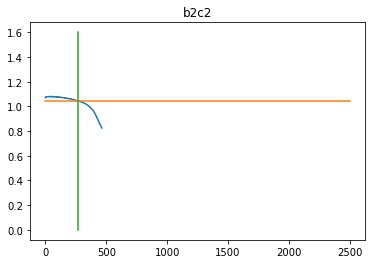

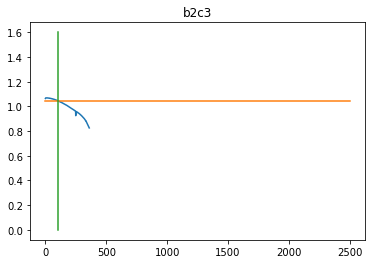

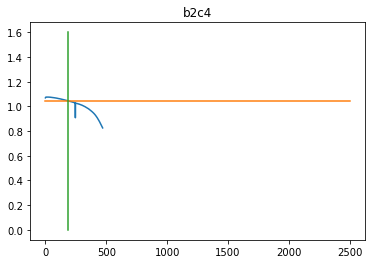

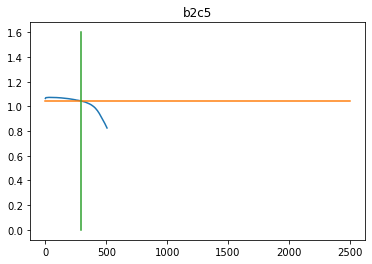

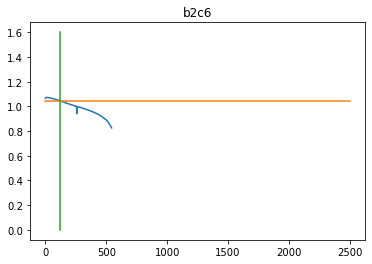

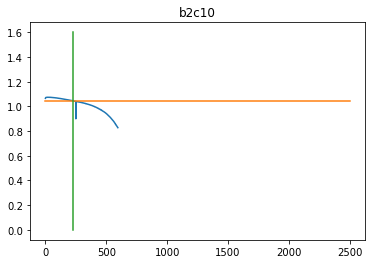

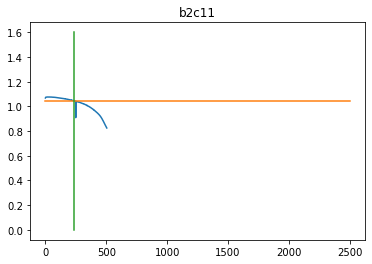

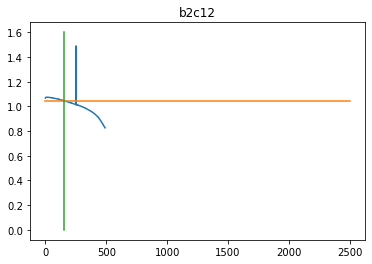

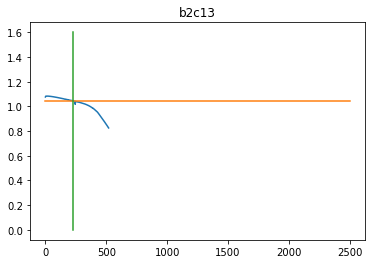

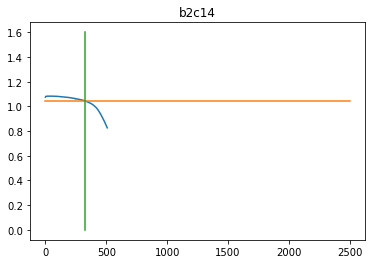

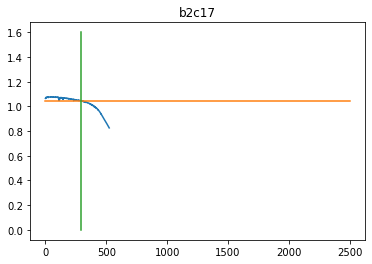

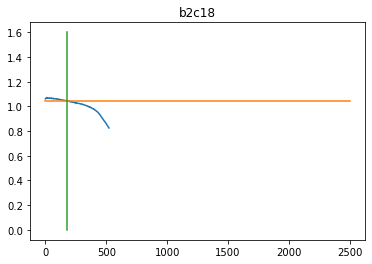

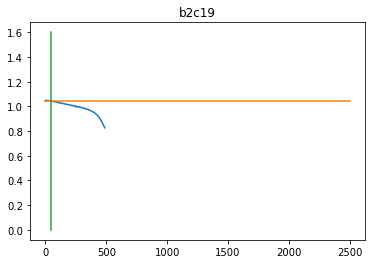

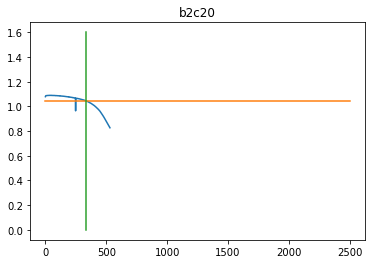

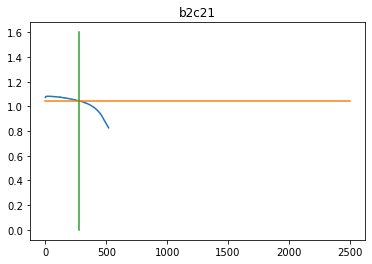

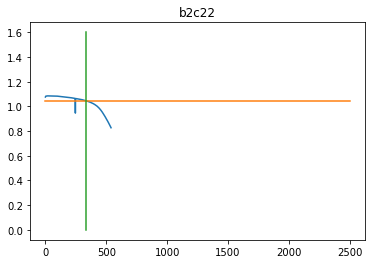

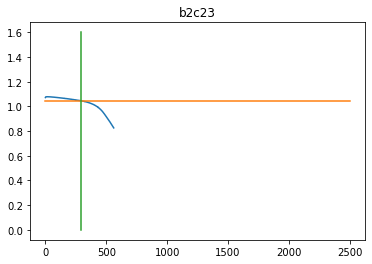

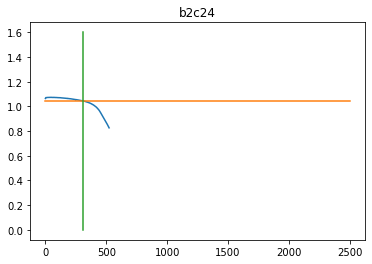

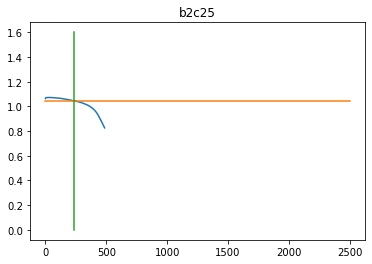

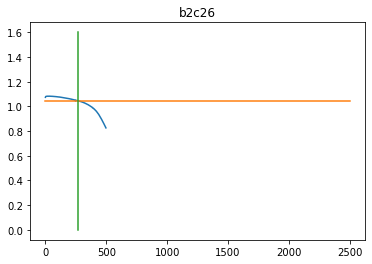

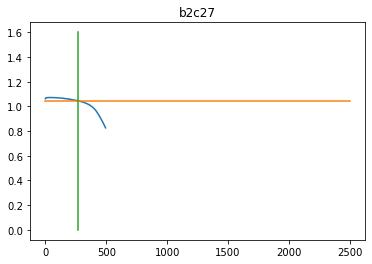

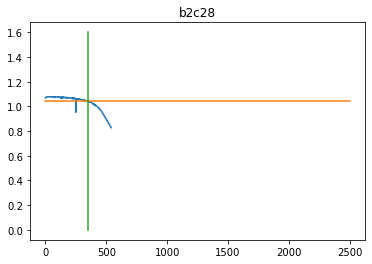

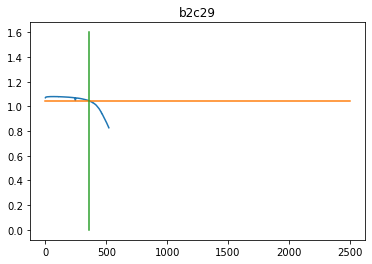

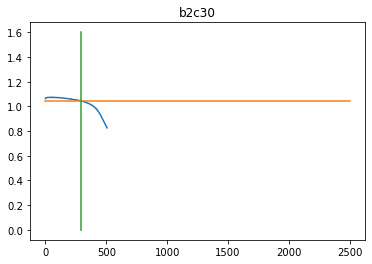

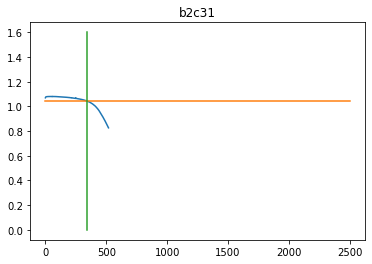

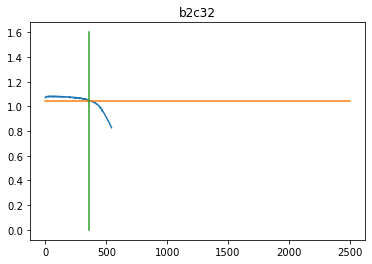

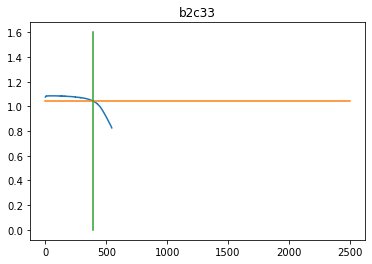

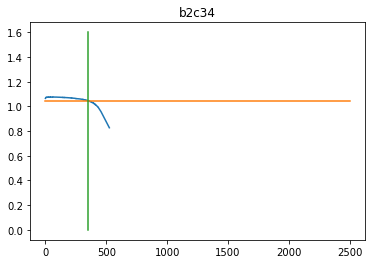

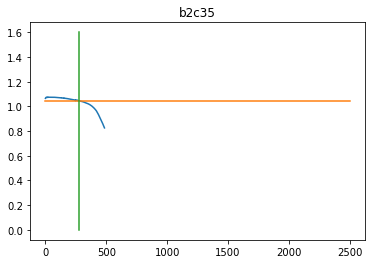

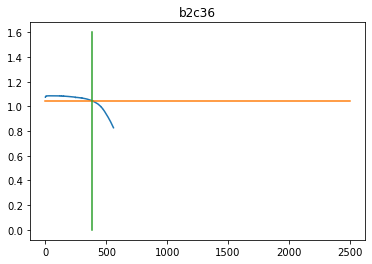

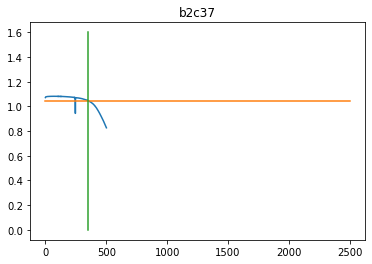

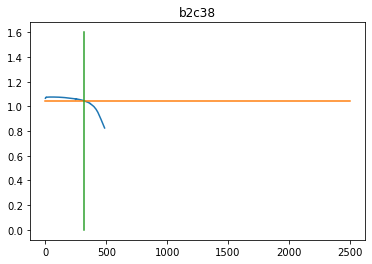

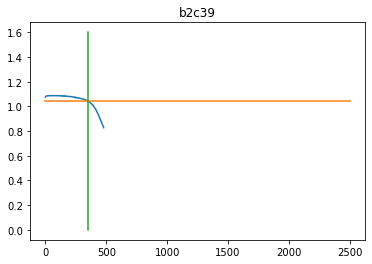

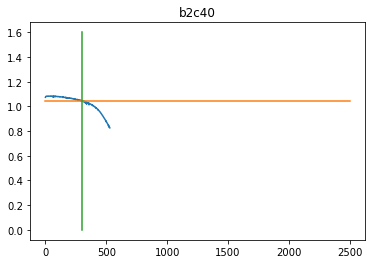

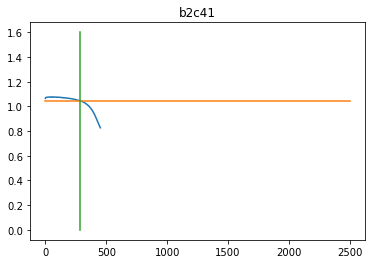

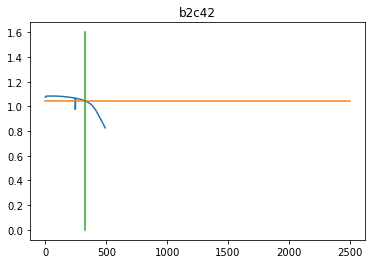

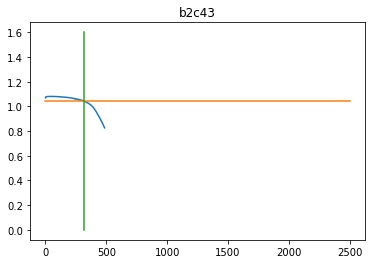

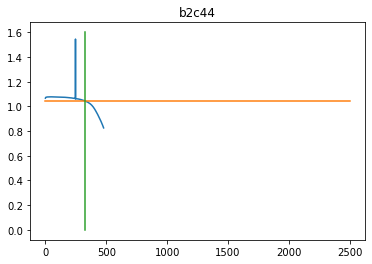

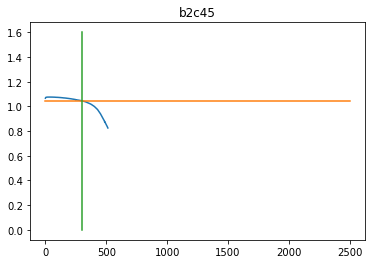

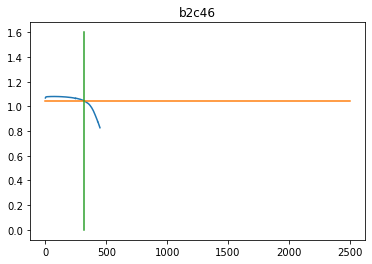

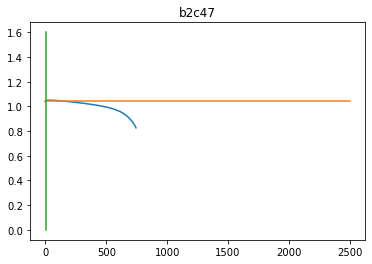

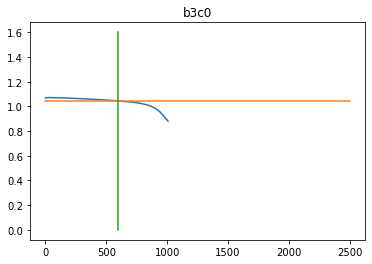

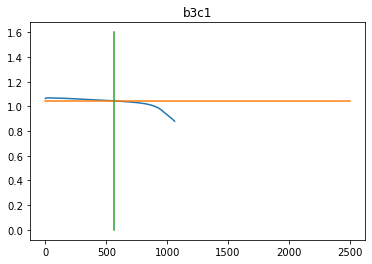

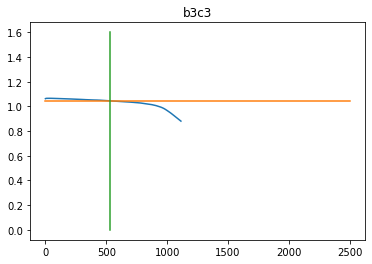

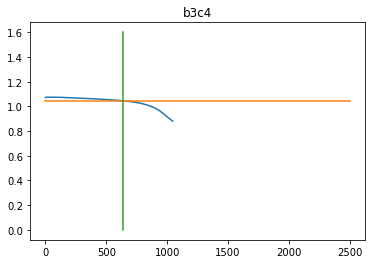

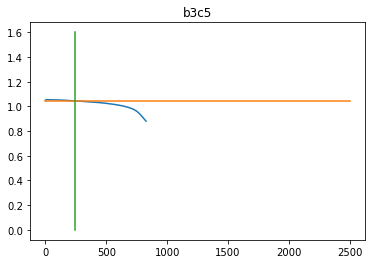

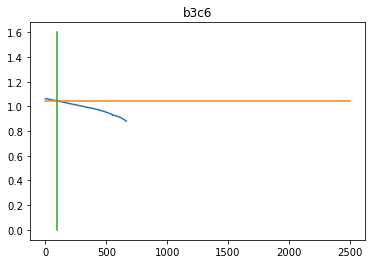

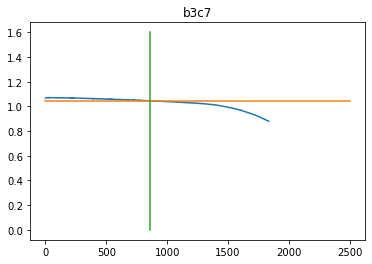

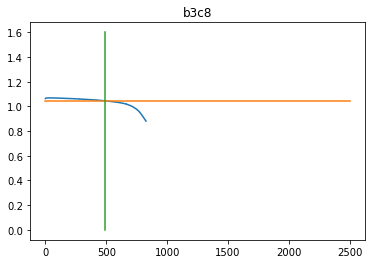

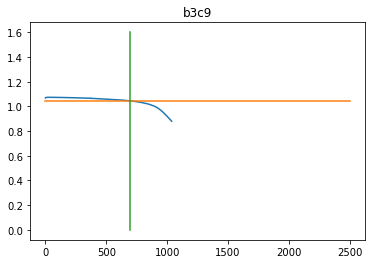

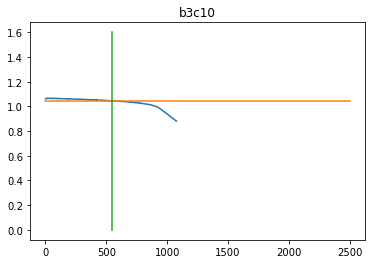

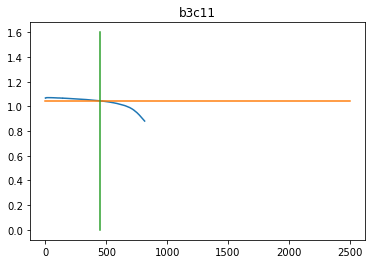

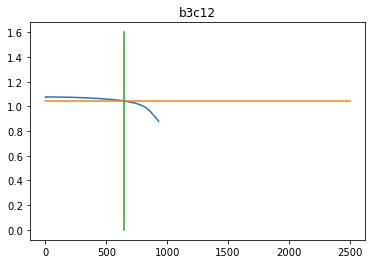

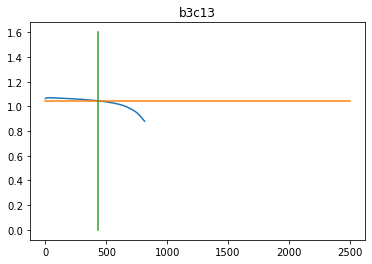

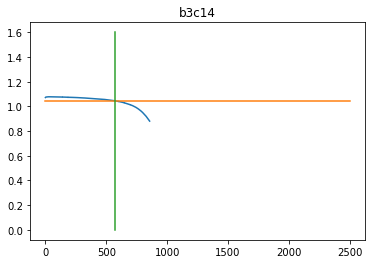

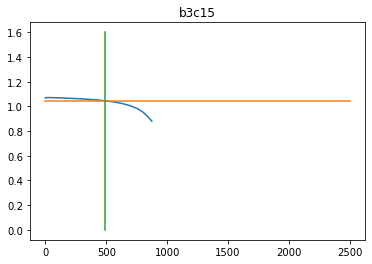

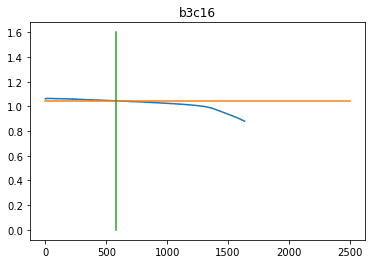

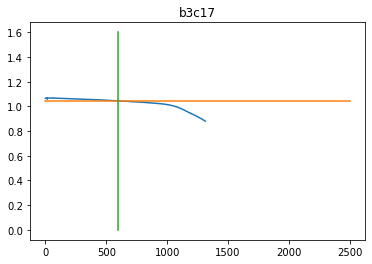

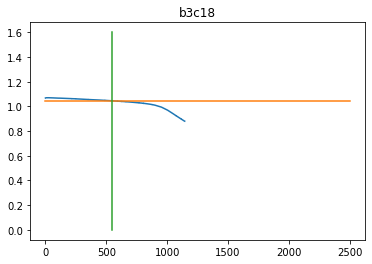

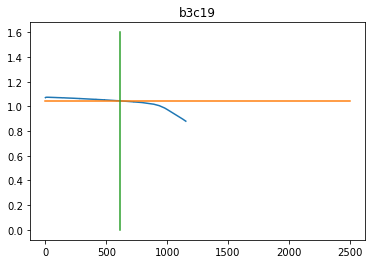

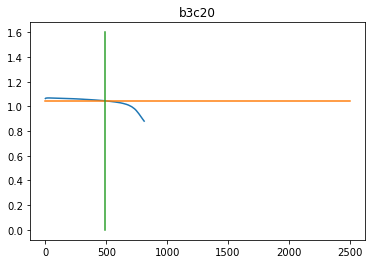

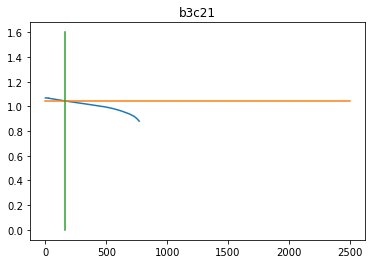

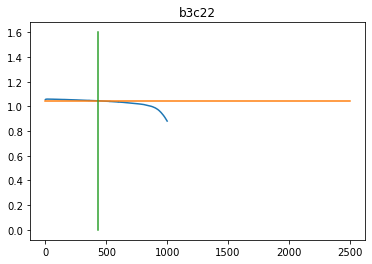

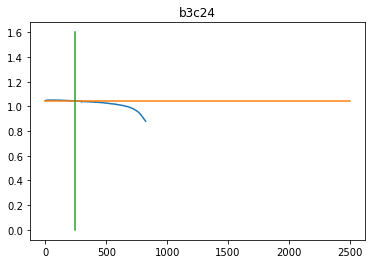

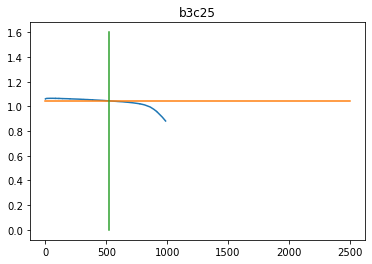

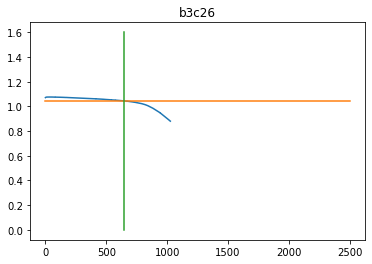

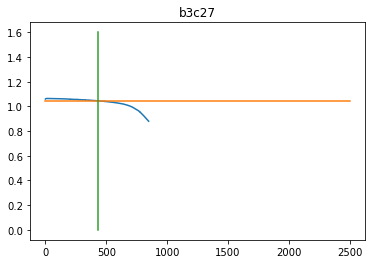

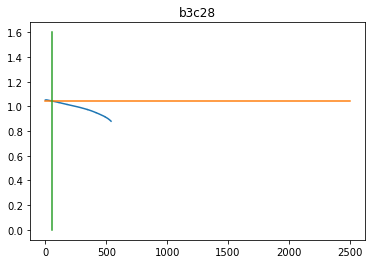

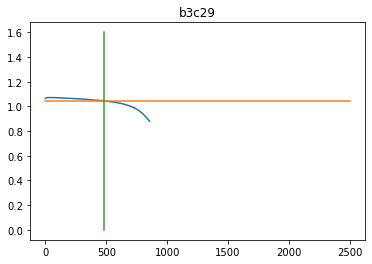

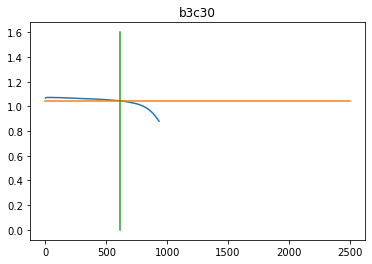

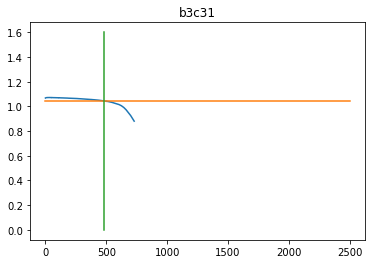

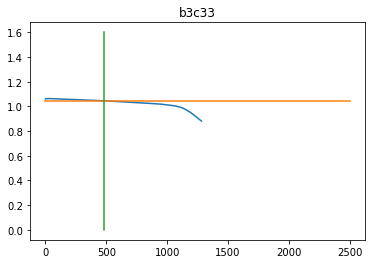

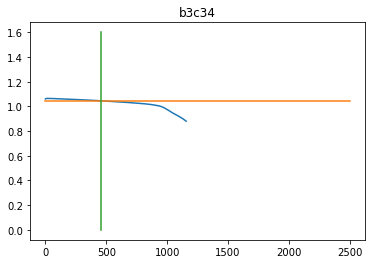

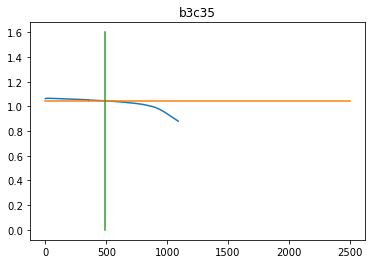

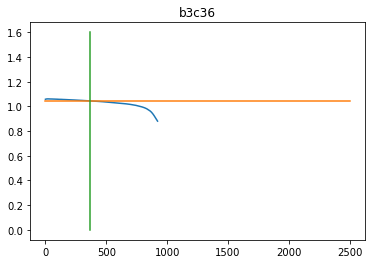

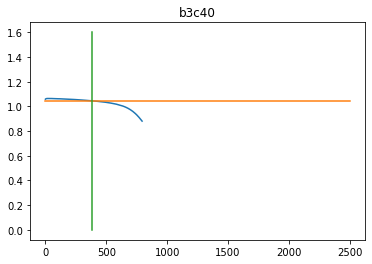

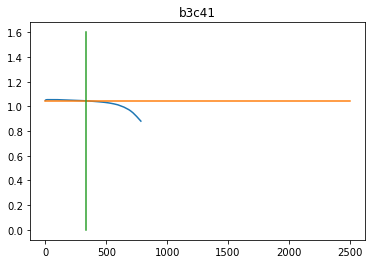

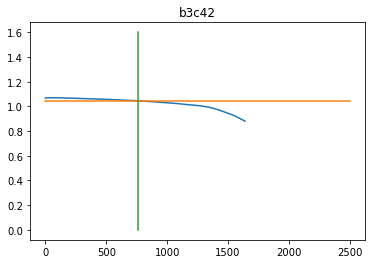

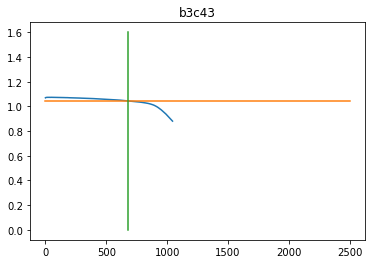

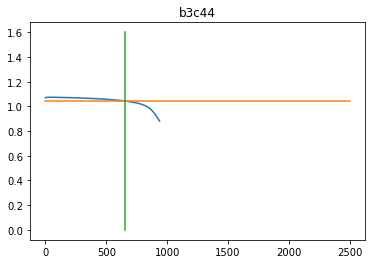

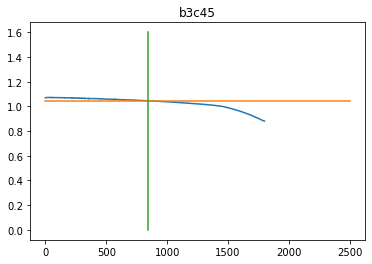

In [28]:
for i,j in enumerate(bat_dict.keys()):
    Rel=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    if list(Delcycle)[0][2]-list(Delcycle)[0][1]==1:
        a=list(Delcycle)[0][1]
    else:
        a=list(Delcycle)[0][10]
    plt.plot(range(len(bat_dict[j]['summary']['QD'])),bat_dict[j]['summary']['QD'])
    x=[0,2500]
    y=[Rel*0.95,Rel*0.95]
    x1=[a,a]
    y1=[0,1.6]
    plt.plot(x,y)
    plt.plot(x1,y1)
    plt.title(j)
    plt.show()
    
# 파란색 선 = 1.1 Ah 의 5% 감소한 값, 노란색 선 = 코드로 얻어낸 1.1Ah 에서 5% 감소했을 때의 cycle life 값 

526
882


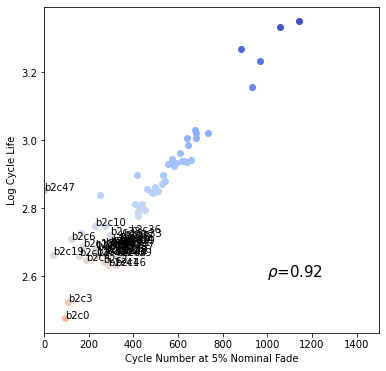

In [29]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

for i,j in enumerate(bat_dict.keys()):
    if any(x in j for x in batch3.keys()):
        continue
    if j=='b2c1':
        continue
    Nom=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Nom*0.95)
    a=list(Delcycle)[0][1]
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    a=fin(Delcycle)
    if j=='b1c0':
        print(a)
        y=list(Delcycle)[0]
        x=range(len(y))
        a=list(Delcycle)[0][117]
        print(a)
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
    if any(x in j for x in batch2.keys()):
        font={'size':5}
        plt.text(a,Cycle,j)
plt.xlabel('Cycle Number at 5% Nominal Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  

526
882
1
123


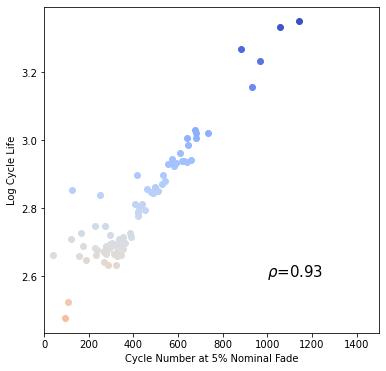

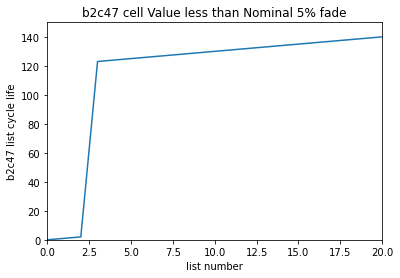

Text(0, 0.5, 'b2c47 list cycle life')

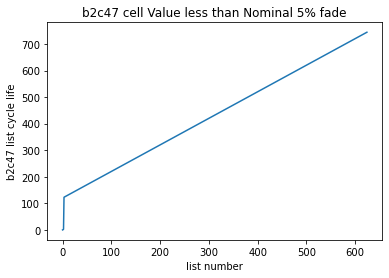

In [30]:
plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

for i,j in enumerate(bat_dict.keys()):
    if any(x in j for x in batch3.keys()):
        continue
    if j=='b2c1':
        continue
    Nom=1.1
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Nom*0.95)
    a=list(Delcycle)[0][1]
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    a=fin(Delcycle)
    if j=='b1c0':
        print(a)
        y=list(Delcycle)[0]
        x=range(len(y))
        a=list(Delcycle)[0][117]
        print(a)
    if j=='b2c47':
        print(a)
        y1=list(Delcycle)[0]
        x1=range(len(y1))
        a=list(Delcycle)[0][3]
        print(a)        
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Nominal Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
font={'size':15}
r = np.round(np.corrcoef(Relcycle,np.log(cycle)),2)
plt.text(1000,2.6,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()  
plt.plot(x1,y1)
plt.title('b2c47 cell Value less than Nominal 5% fade')
plt.xlabel('list number')
plt.ylabel('b2c47 list cycle life')
plt.xlim(0,20)
plt.ylim(0,150)
plt.show()
plt.plot(x1,y1)
plt.title('b2c47 cell Value less than Nominal 5% fade')
plt.xlabel('list number')
plt.ylabel('b2c47 list cycle life')

In [31]:
# 5% fade 인 곳을 찾아주는 코드 
#single feature , linear model , log cycle life , capacity fade= relative fade(cycle 2), train and test split same
def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+2]-list(Delcycle)[0][k+1])==1:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

def split_data(n):
    bat1_2 = {**batch1, **batch2}
    Train_data=np.array([])
    Train_label=np.array([])
    Primary_data=np.array([])
    Primary_label=np.array([])
    Secondary_data=np.array([])
    Secondary_label=np.array([])    
    for i,j in enumerate(bat1_2.keys()):
        if j=='b2c1':
            continue
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*n)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist()) # cycle log 이미 적용.
        a=fin(Delcycle)
        if i%2==1:
            Train_data=np.append(Train_data,a)
            Train_label=np.append(Train_label,Cycle)
        if i%2==0:
            Primary_data=np.append(Primary_data,a)
            Primary_label=np.append(Primary_label,Cycle)
        if i==83:
            Primary_data=np.append(Primary_data,a)
            Primary_label=np.append(Primary_label,Cycle)
    for i,j in enumerate(batch3.keys()):
        if j=='b3c16':
            continue
        if j=='b3c17':
            continue
        if j=='b3c42':
            continue
        if j=='b3c43':
            continue
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*n)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)         
        Secondary_data=np.append(Secondary_data,a)
        Secondary_label=np.append(Secondary_label,Cycle)              
    return (np.log10(Train_data),Train_label),(np.log10(Primary_data),Primary_label),(np.log10(Secondary_data),Secondary_label)



(T_d,T_l),(P_d,P_l),(S_d,S_l)=split_data(0.95)


In [32]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
def make_rmse(T_d,T_l,P_d,P_l,S_d,S_l):
    regr=ElasticNetCV(cv=4)
    T_d=T_d.reshape(-1,1)
    P_d=P_d.reshape(-1,1)
    S_d=S_d.reshape(-1,1)
    regr.fit(T_d,T_l)
    pred1=regr.predict(T_d)
    rmse1=np.sqrt(mean_squared_error(10**T_l,10**pred1))
    pred2=regr.predict(P_d)
    rmse2=np.sqrt(mean_squared_error(10**P_l,10**pred2))
    pred3=regr.predict(S_d)
    rmse3=np.sqrt(mean_squared_error(10**S_l,10**pred3))
    return rmse1,rmse2,rmse3

In [33]:
np.linspace(0.995,0.9,20)

array([0.995, 0.99 , 0.985, 0.98 , 0.975, 0.97 , 0.965, 0.96 , 0.955,
       0.95 , 0.945, 0.94 , 0.935, 0.93 , 0.925, 0.92 , 0.915, 0.91 ,
       0.905, 0.9  ])

In [34]:
T_rmse=np.array([])
P_rmse=np.array([])
S_rmse=np.array([])
x_axis=(1-np.linspace(0.995,0.9,20))*100
for i in np.linspace(0.995,0.9,20):
    (T_d,T_l),(P_d,P_l),(S_d,S_l)=split_data(i)
    Train,Primary_test,Secondary_test=make_rmse(T_d,T_l,P_d,P_l,S_d,S_l)
    T_rmse=np.append(T_rmse,Train)
    P_rmse=np.append(P_rmse,Primary_test)
    S_rmse=np.append(S_rmse,Secondary_test)

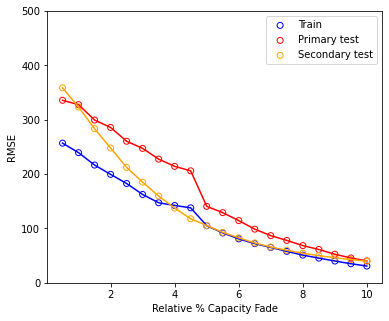

In [35]:
plt.figure(figsize=(6,5))
plt.scatter(x_axis,T_rmse,edgecolors='b',facecolors='none',label='Train')
plt.plot(x_axis,T_rmse,color='b')
plt.scatter(x_axis,P_rmse,edgecolors='r',facecolors='none',label='Primary test')
plt.plot(x_axis,P_rmse,color='r')
plt.scatter(x_axis,S_rmse,edgecolors='orange',facecolors='none',label='Secondary test')
plt.plot(x_axis,S_rmse,color='orange')
plt.legend()
plt.xlabel('Relative % Capacity Fade')
plt.ylabel('RMSE')
plt.ylim(0,500)
plt.show()

In [89]:
# 5% fade 인 곳을 찾아주는 코드 
#single feature , linear model , log cycle life , capacity fade= relative fade(cycle 2), train and test split same
def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+2]-list(Delcycle)[0][k+1])==1:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

def split_data(n):
    bat1_2 = {**batch1, **batch2}
    Train_data=np.array([])
    Train_label=np.array([])
    Primary_data=np.array([])
    Primary_label=np.array([])
    Secondary_data=np.array([])
    Secondary_label=np.array([])    
    for i,j in enumerate(bat1_2.keys()):
        if j=='b2c1':
            continue
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*n)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)
        if i%2==1:
            Train_data=np.append(Train_data,a)
            Train_label=np.append(Train_label,Cycle)
        if i%2==0:
            Primary_data=np.append(Primary_data,a)
            Primary_label=np.append(Primary_label,Cycle)
        if i==83:
            Primary_data=np.append(Primary_data,a)
            Primary_label=np.append(Primary_label,Cycle)
    for i,j in enumerate(batch3.keys()):
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*n)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)         
        Secondary_data=np.append(Secondary_data,a)
        Secondary_label=np.append(Secondary_label,Cycle)              
    return (np.log10(Train_data),Train_label),(np.log10(Primary_data),Primary_label),(np.log10(Secondary_data),Secondary_label)

In [90]:
T_rmse=np.array([])
P_rmse=np.array([])
S_rmse=np.array([])
x_axis=(1-np.linspace(0.995,0.9,20))*100
for i in np.linspace(0.995,0.9,20):
    (T_d,T_l),(P_d,P_l),(S_d,S_l)=split_data(i)
    Train,Primary_test,Secondary_test=make_rmse(T_d,T_l,P_d,P_l,S_d,S_l)
    T_rmse=np.append(T_rmse,Train)
    P_rmse=np.append(P_rmse,Primary_test)
    S_rmse=np.append(S_rmse,Secondary_test)

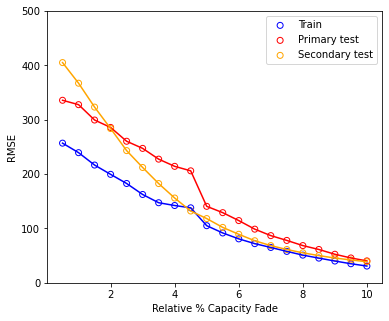

In [91]:
plt.figure(figsize=(6,5))
plt.scatter(x_axis,T_rmse,edgecolors='b',facecolors='none',label='Train')
plt.plot(x_axis,T_rmse,color='b')
plt.scatter(x_axis,P_rmse,edgecolors='r',facecolors='none',label='Primary test')
plt.plot(x_axis,P_rmse,color='r')
plt.scatter(x_axis,S_rmse,edgecolors='orange',facecolors='none',label='Secondary test')
plt.plot(x_axis,S_rmse,color='orange')
plt.legend()
plt.xlabel('Relative % Capacity Fade')
plt.ylabel('RMSE')
plt.ylim(0,500)
plt.show()

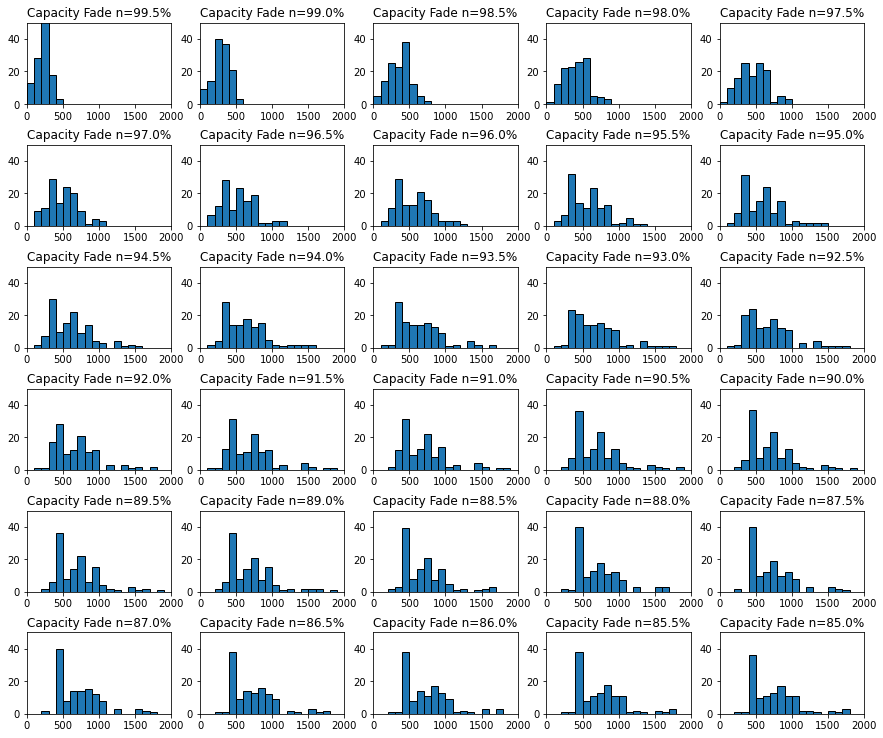

In [92]:
from matplotlib import gridspec
cycle_n=[]
for i in np.linspace(0.995,0.85,30):
    (T_d,T_l),(P_d,P_l),(S_d,S_l)=split_data(i)
    c=np.concatenate((T_d,P_d,S_d),axis=None)
    cycle_n.append(10**c)
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
gs = gridspec.GridSpec(nrows=6, # row 몇 개 
                       ncols=5, # col 몇 개 
                       height_ratios=[1, 1, 1, 1, 1,1], 
                       width_ratios=[1,1,1,1,1]
                      )
for n in range(30):
    ax=plt.subplot(gs[n])
    ax.set_ylim([0,50])
    ax.set_xlim([0,2000])
    bins=np.arange(0,2000,100)
    ax.hist(cycle_n[n],bins,edgecolor='black')
    f=np.linspace(0.995,0.85,30)[n]*100
    ax.set_title('Capacity Fade n={:.1f}%'.format(f))
    
    

In [93]:
print(np.mean(cycle_n[3]),np.mean(cycle_n[-1]))

413.71774193548384 773.1451612903226


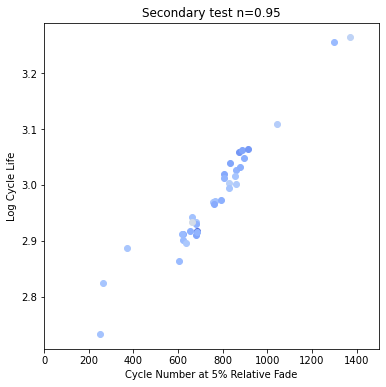

In [297]:
# 5% fade 인 곳을 찾아주는 코드 

plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+20]-list(Delcycle)[0][k+1])==19:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]


for i,j in enumerate(batch3.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Rel=bat_dict[j]['summary']['QD'][2]
    Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
    Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
    a=fin(Delcycle)
    Relcycle=np.append(Relcycle,a)
    cycle=np.append(cycle,Cycle)
    plt.scatter(a,Cycle,color=changecolor[83+i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
plt.title('Secondary test n=0.95')
plt.show()  


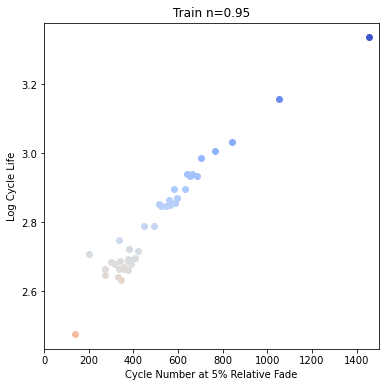

In [296]:
# 5% fade 인 곳을 찾아주는 코드 

plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+20]-list(Delcycle)[0][k+1])==19:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

bat1_2 = {**batch1, **batch2}
for i,j in enumerate(bat1_2.keys()):
    if i%2==1:
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)
        Relcycle=np.append(Relcycle,a)
        cycle=np.append(cycle,Cycle)
        plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
plt.title('Train n=0.95')
plt.show()  


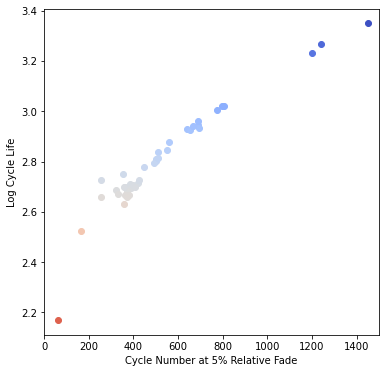

In [294]:
# 5% fade 인 곳을 찾아주는 코드 

plt.figure(figsize=(6,6))
Relcycle=np.array([])
cycle=np.array([])

def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+20]-list(Delcycle)[0][k+1])==19:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

bat1_2 = {**batch1, **batch2}
for i,j in enumerate(bat1_2.keys()):
    if i%2==1:
        continue
    else:
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*0.95)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)
        Relcycle=np.append(Relcycle,a)
        cycle=np.append(cycle,Cycle)
        plt.scatter(a,Cycle,color=changecolor[i])
plt.xlabel('Cycle Number at 5% Relative Fade')
plt.xlim(0,1500)
plt.ylabel('Log Cycle Life')
plt.show()  

In [298]:
# 5% fade 인 곳을 찾아주는 코드 

#batch 1, 2, 3 으로 관찰 했을 때

#single feature , linear model , log cycle life , capacity fade= relative fade(cycle 2), train and test split same
def fin(Delcycle):
    k=0 
    while True:
        if (list(Delcycle)[0][k+2]-list(Delcycle)[0][k+1])==1:
            break
        else:
            k+=1
    return list(Delcycle)[0][k+1]

def split_data(n):
    Train_data=np.array([])
    Train_label=np.array([])
    Primary_data=np.array([])
    Primary_label=np.array([])
    Secondary_data=np.array([])
    Secondary_label=np.array([])    
    for i,j in enumerate(bat_dict.keys()):
        if j=='b2c1':
            continue
        
        Rel=bat_dict[j]['summary']['QD'][2]
        Delcycle=np.where(bat_dict[j]['summary']['QD']<Rel*n)
        Cycle=np.log10(bat_dict[j]['cycle_life'].reshape(-1).tolist())
        a=fin(Delcycle)
        if any(x in j for x in batch1.keys()):
            Train_data=np.append(Train_data,a)
            Train_label=np.append(Train_label,Cycle)
        if any(x in j for x in batch2.keys()):
            Primary_data=np.append(Primary_data,a)
            Primary_label=np.append(Primary_label,Cycle)
        if any(x in j for x in batch3.keys()):
            Secondary_data=np.append(Secondary_data,a)
            Secondary_label=np.append(Secondary_label,Cycle)
            
            
            
    return (np.log10(Train_data),Train_label),(np.log10(Primary_data),Primary_label),(np.log10(Secondary_data),Secondary_label)

In [299]:
T_rmse=np.array([])
P_rmse=np.array([])
S_rmse=np.array([])
x_axis=(1-np.linspace(0.995,0.9,20))*100
for i in np.linspace(0.995,0.9,20):
    (T_d,T_l),(P_d,P_l),(S_d,S_l)=split_data(i)
    Train,Primary_test,Secondary_test=make_rmse(T_d,T_l,P_d,P_l,S_d,S_l)
    T_rmse=np.append(T_rmse,Train)
    P_rmse=np.append(P_rmse,Primary_test)
    S_rmse=np.append(S_rmse,Secondary_test)

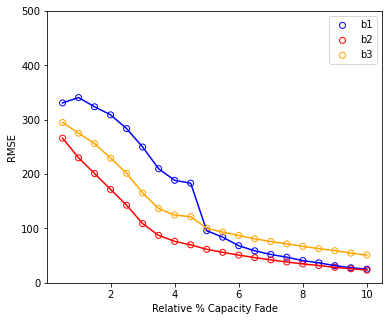

In [300]:
plt.figure(figsize=(6,5))
plt.scatter(x_axis,T_rmse,edgecolors='b',facecolors='none',label='b1')
plt.plot(x_axis,T_rmse,color='b')
plt.scatter(x_axis,P_rmse,edgecolors='r',facecolors='none',label='b2')
plt.plot(x_axis,P_rmse,color='r')
plt.scatter(x_axis,S_rmse,edgecolors='orange',facecolors='none',label='b3')
plt.plot(x_axis,S_rmse,color='orange')
plt.legend()
plt.xlabel('Relative % Capacity Fade')
plt.ylabel('RMSE')
plt.ylim(0,500)
plt.show()

In [104]:
bat_dict['b1c0']['cycles']['10']['dQdV']

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.31254283e-04, -2.05229058e-03,
       -4.26310889e-03, -7.26370922e-03, -1.10540916e-02, -1.56342559e-02,
       -2.10042023e-02, -2.64463551e-02, -3.18885079e-02, -3.66994065e-02,
       -4.07205230e-02, -4.39518575e-02, -4.63934100e-02, -4.80451805e-02,
       -4.89071689e-02, -4.89793754e-02, -4.89793754e-02, -4.89793754e-02,
       -4.89793754e-02, -4.89793754e-02, -4.89793754e-02, -4.89793754e-02,
       -4.89793754e-02, -4.89793754e-02, -4.89793754e-02, -4.89793754e-02,
       -4.89793754e-02, -4.89793754e-02, -4.89793754e-02, -4.89793754e-02,
       -4.89793754e-02, -4.89793754e-02, -4.89793754e-02, -4.89793754e-02,
       -5.05571557e-02, -5.38290845e-02, -5.87951615e-02, -6.54553870e-02,
       -7.38097608e-02, -8.38582829e-02, -9.54719037e-02, -1.07085524e-01,
       -1.18699145e-01, -1.28734986e-01, -1.37076678e-01, -1.43724222e-01,
       -1.48677617e-01, -

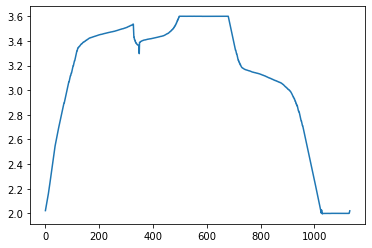

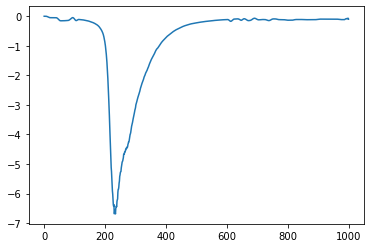

C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


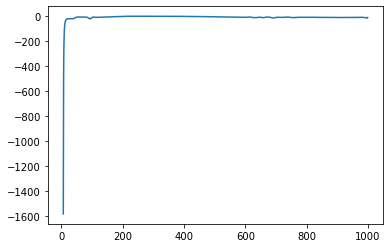

In [112]:
nu=range(len(bat_dict['b1c0']['cycles']['10']['dQdV']))
nu1=range(len(bat_dict['b1c0']['cycles']['10']['V']))
plt.plot(nu1,bat_dict['b1c0']['cycles']['10']['V'])
plt.show()
plt.plot(nu,bat_dict['b1c0']['cycles']['10']['dQdV'])
plt.show()


In [110]:
len(bat_dict['b1c0']['cycles']['10']['V']),len(bat_dict['b1c0']['cycles']['10']['dQdV'])

(1133, 1000)

In [ ]:
def EC_dQdV(Q, Ewe, Q_scale,*args):
    varargin = args
    step = varargin
    nargin = 3 + len(varargin)
    if nargin == 3:
        step = 0.004
    
    numV = len(Ewe)
    i=1
    Q = Q/Q_scale
    
    dV=[]
    V=[]
    dQ=[]
    while i<numV:
        diff=0
        j=1
        while diff<step and (i+j)<(len(Ewe)-1):
            diff=abs(Ewe[i+j]-Ewe[i])
            j=j+1
        dv=Ewe[i+j]-Ewe[i]
        dV.append(dv)
        v = Ewe[i]
        V.append(v)
        dq=Q[i+j]-Q[i]
        dQ.append(dq)
        i=i+1
        
    V=np.array(V)
    ind=np.argmin(V)
    
    dV=np.array(dV)
    dQ=np.array(dQ)
    
    
    
    V=np.concatenate(V[1:ind],V[ind+2:],axis=None)
    dV=np.concatenate(dV[1:ind],dV[ind+2:],axis=None)
    dQ=np.concatenate(dQ[1:ind],dQ[ind+2:],axis=None)
    dQdV = dQ/dV
    
    zero=np.where(dQdV=0)
    dQdV=np.delete(dQdV,zero)
    V=np.delete(V,zero)
    
    nan_=np.where(np.isnan(dQdV))
    dQdV=np.delete(dQdV,nan_)
    V=np.delete(V,nan_)
    
    return V, dQdV

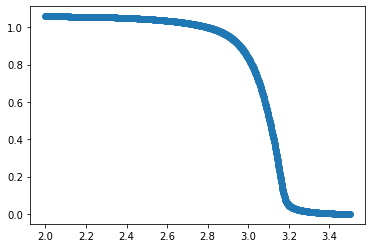

In [119]:
x_value=np.linspace(3.5,2,1000)
plt.scatter(x_value,bat_dict['b1c0']['cycles']['10']['Qdlin'])

In [177]:
# 2~3.5 까지 V 를 갖고 spline fitting 진행. Qdlin Spline fitting 되어있는 데이터를 이용하여 기울기를 구한다. 
bat_dict['b1c0']['charge_policy']

'3.6C(80%)-3.6C'

In [241]:
bat_dict['b1c0']['cycles']['1']['I'][100:120]

array([3.60013273, 3.60040664, 3.59980845, 3.59971655, 3.59989509,
       3.59972436, 3.59992636, 3.60026182, 3.60008409, 3.60012836,
       3.60001391, 3.60004164, 3.60004164, 3.59996536, 3.60022545,
       3.60022545, 3.60014309, 3.60014309, 3.59995491, 3.600026  ])

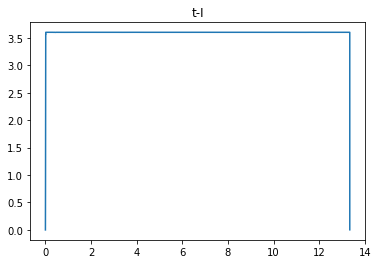

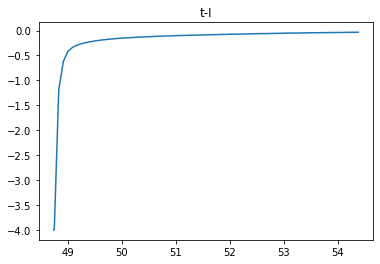

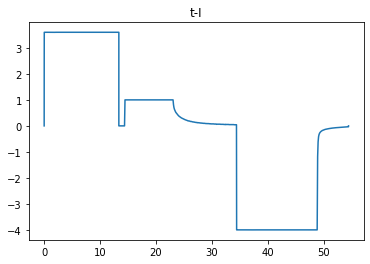

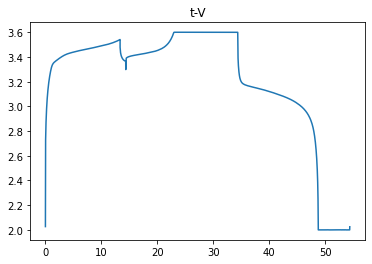

In [233]:
plt.plot(bat_dict['b1c0']['cycles']['1']['t'][:318],bat_dict['b1c0']['cycles']['1']['I'][:318])
plt.title('t-I')
plt.show()
plt.plot(bat_dict['b1c0']['cycles']['1']['t'][-100:-1],bat_dict['b1c0']['cycles']['1']['I'][-100:-1])
plt.title('t-I')
plt.show()
plt.plot(bat_dict['b1c0']['cycles']['2']['t'],bat_dict['b1c0']['cycles']['2']['I'])
plt.title('t-I')
plt.show()
plt.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['V'])
plt.title('t-V')
plt.show()

In [228]:
bat_dict['b1c0']['cycles']['1']['t'][320]

13.508923333333344

In [221]:
from scipy import integrate

integrate.trapz(bat_dict['b1c0']['cycles']['2']['I'][:316],bat_dict['b1c0']['cycles']['2']['t'][:316]/60)

0.7934865377395061

In [126]:
len(bat_dict['b1c0']['cycles']['10']['I']*bat_dict['b1c0']['cycles']['10']['t'])

1133

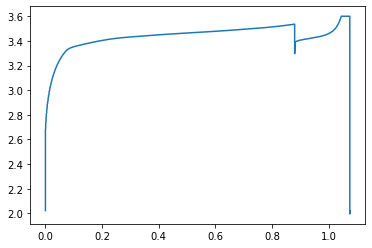

In [129]:
plt.plot(bat_dict['b1c0']['cycles']['10']['Qc'],bat_dict['b1c0']['cycles']['10']['V'])

Text(0, 0.5, 'Capacity(Ah)')

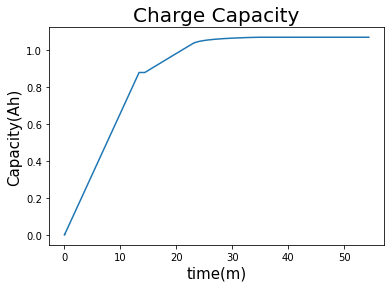

In [245]:
plt.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['Qc'])
plt.title('Charge Capacity',size=20)
plt.xlabel('time(m)',size=15)
plt.ylabel('Capacity(Ah)',size=15)

In [198]:
a=len(bat_dict['b1c0']['cycles']['1']['V'])
for i in range(a-1,0,-1):
    if bat_dict['b1c0']['cycles']['1']['I'][i]>3.55:
        print(i)
        break

316


In [141]:
bat_dict['b1c1']['cycles']['1']['Qc'][-1]

1.0750588

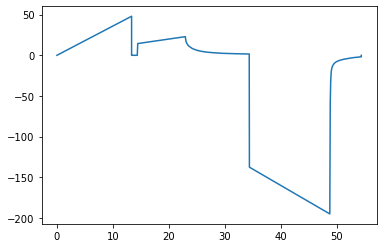

In [158]:
plt.plot(bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['I']*bat_dict['b1c0']['cycles']['1']['t'])

In [159]:
sumq=0
for i in range(len(bat_dict['b1c0']['cycles']['1']['I'])):
    sumq+= bat_dict['b1c0']['cycles']['1']['I'][i]*bat_dict['b1c0']['cycles']['1']['t'][i]
    
sumq

-48418.69864586411

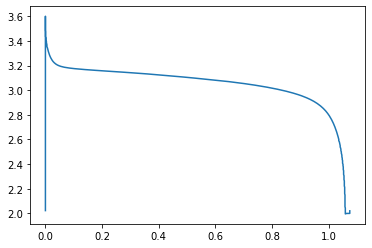

In [130]:
plt.plot(bat_dict['b1c0']['cycles']['10']['Qd'],bat_dict['b1c0']['cycles']['10']['V'])

C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


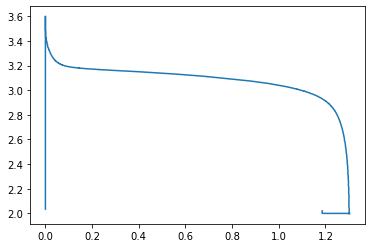

In [249]:
plt.plot((bat_dict['b1c0']['cycles']['10']['Qd']*60)/bat_dict['b1c0']['cycles']['10']['t'],bat_dict['b1c0']['cycles']['10']['V'])

Text(0, 0.5, 'Capacity(Ah)')

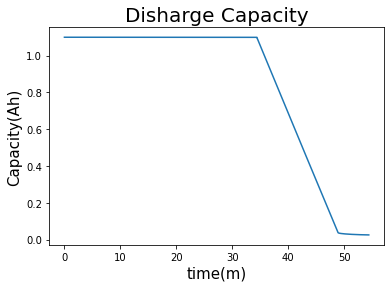

In [246]:
plt.plot(bat_dict['b1c0']['cycles']['10']['t'],(1.1-bat_dict['b1c0']['cycles']['10']['Qd']))
plt.title('Disharge Capacity',size=20)
plt.xlabel('time(m)',size=15)
plt.ylabel('Capacity(Ah)',size=15)

In [240]:
bat_dict['b1c0']['cycles']['1']['t'],bat_dict['b1c0']['cycles']['1']['I']
Q=0
for i in range(318):

    dt=(bat_dict['b1c0']['cycles']['1']['t'][i+1]-bat_dict['b1c0']['cycles']['1']['t'][i])/60
    di=(bat_dict['b1c0']['cycles']['1']['I'][i+1]+bat_dict['b1c0']['cycles']['1']['I'][i])*1.1/2
    dq=dt*di
    Q+=dq
print(Q)

0.8800229395841779


In [252]:
bat_dict['b1c0']['summary']['IR']

array([0.        , 0.01674235, 0.01672431, ..., 0.0181332 , 0.0181233 ,
       0.0181211 ])

In [253]:
bat_dict['b1c0']['summary']['QD']

array([0.        , 1.0706892 , 1.0719005 , ..., 0.88462406, 0.88433141,
       0.88280821])